In this section, we include results of computational methods. All of the code to generate these results is included in Appendix Section \ref{sec:app}. 

Q1: Should we include the libraries we are using to calculate this?

Q2.0: What is the order of results
- Mappings
-  Connect Mappings to Flow Patterns


Q2: What are the different mappings we want to create?
- Unit Disk to UHP
- UHP to strip
- Unit Disk to strip
- Art. Ideas:
    -Logo (Pillsbury)
    - ?

Below includes 
- Unit Disk to Upper Half Plane
- Upper Half Plane to strip

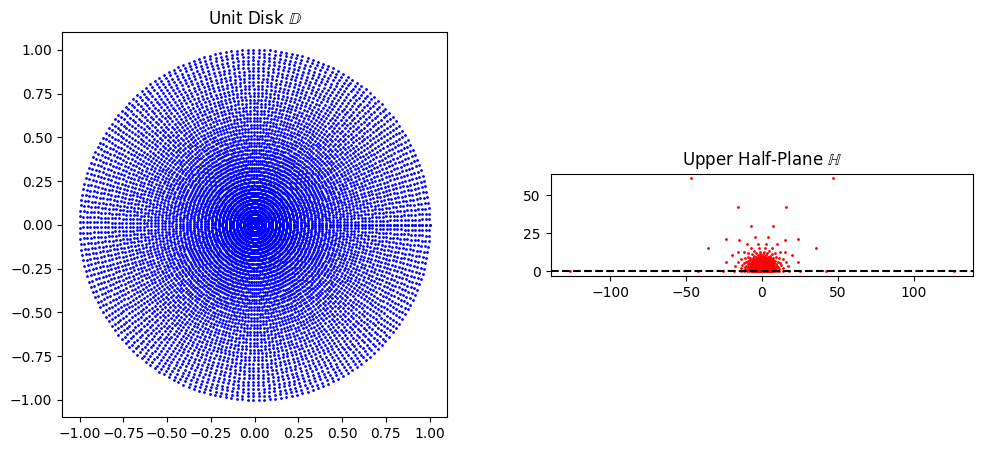

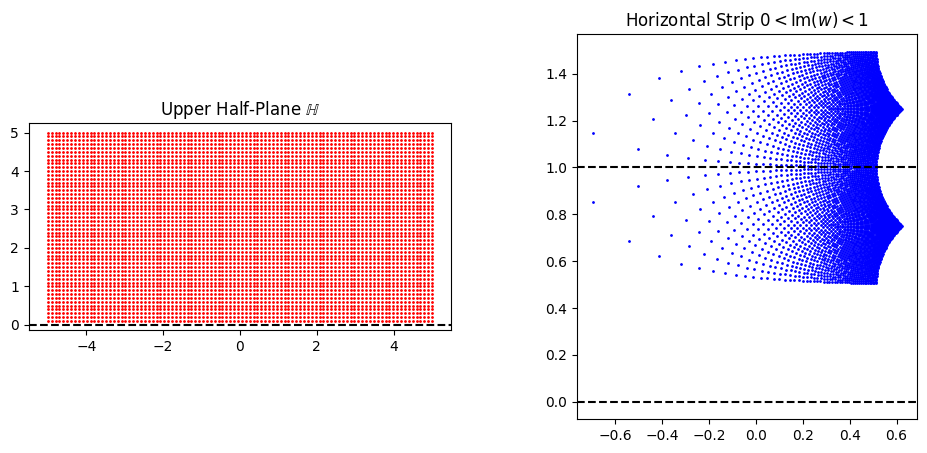

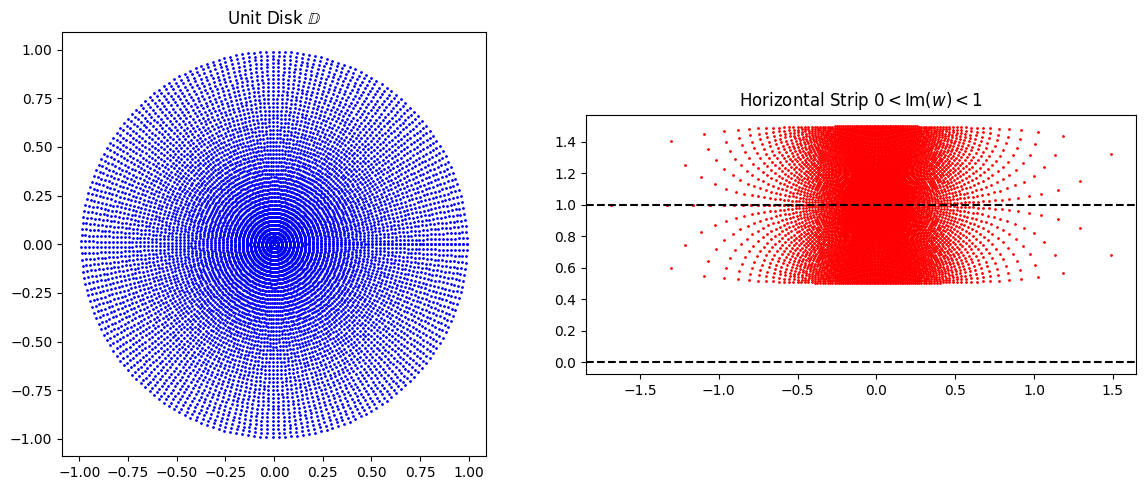

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================
# 1. Map Unit Disk to Upper Half-Plane (UHP)
# =============================================
def disk_to_uhp(z):
    return 1j * (1 - z) / (1 + z)

# Generate grid in the unit disk
theta = np.linspace(0, 2*np.pi, 200)
r = np.linspace(0, 1, 50)
Theta, R = np.meshgrid(theta, r)
Z_disk = R * np.exp(1j*Theta)  # Polar grid

# Apply transformation
W_uhp = disk_to_uhp(Z_disk)

# Plot Unit Disk and UHP
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title("Unit Disk $\mathbb{D}$")
plt.scatter(Z_disk.real, Z_disk.imag, c='b', s=1)
plt.gca().set_aspect('equal')

plt.subplot(122)
plt.title("Upper Half-Plane $\mathbb{H}$")
plt.scatter(W_uhp.real, W_uhp.imag, c='r', s=1)
plt.axhline(0, color='k', linestyle='--')  # Real axis
plt.gca().set_aspect('equal')

# =============================================
# 2. Map UHP to Horizontal Strip
# =============================================
def uhp_to_strip(z):
    return (1/np.pi) * np.log(z) + 0.5j

# Generate grid in UHP (avoid z=0)
x = np.linspace(-5, 5, 100)
y = np.linspace(0.1, 5, 50)
X, Y = np.meshgrid(x, y)
Z_uhp = X + 1j*Y  # Grid in UHP

# Apply transformation
W_strip = uhp_to_strip(Z_uhp)

# Plot UHP and Strip
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title("Upper Half-Plane $\mathbb{H}$")
plt.scatter(Z_uhp.real, Z_uhp.imag, c='r', s=1)
plt.axhline(0, color='k', linestyle='--')
plt.gca().set_aspect('equal')

plt.subplot(122)
plt.title("Horizontal Strip $0 < \mathrm{Im}(w) < 1$")
plt.scatter(W_strip.real, W_strip.imag, c='b', s=1)
plt.axhline(0, color='k', linestyle='--')
plt.axhline(1, color='k', linestyle='--')
plt.gca().set_aspect('equal')

plt.show()

# =============================================
# Composite Map: Unit Disk → Horizontal Strip
# =============================================
def disk_to_strip(z):
    # Step 1: Map disk to upper half-plane
    w1 = 1j * (1 - z) / (1 + z)
    # Step 2: Map upper half-plane to strip
    return (1/np.pi) * np.log(w1) + 0.5j

# Generate grid in the unit disk (avoid z = -1)
theta = np.linspace(0, 2*np.pi, 200)
r = np.linspace(0, 0.99, 50)  # Avoid edge singularity at |z|=1
Theta, R = np.meshgrid(theta, r)
Z_disk = R * np.exp(1j*Theta)  # Polar grid

# Apply composite transformation
W_strip = disk_to_strip(Z_disk)

# Plot results
plt.figure(figsize=(12, 5))

# Unit Disk
plt.subplot(121)
plt.title("Unit Disk $\mathbb{D}$")
plt.scatter(Z_disk.real, Z_disk.imag, c='b', s=1)
plt.gca().set_aspect('equal')

# Horizontal Strip
plt.subplot(122)
plt.title("Horizontal Strip $0 < \mathrm{Im}(w) < 1$")
plt.scatter(W_strip.real, W_strip.imag, c='r', s=1)
plt.axhline(0, color='k', linestyle='--')  # Lower boundary
plt.axhline(1, color='k', linestyle='--')  # Upper boundary
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

Asked Claude to improve and extend

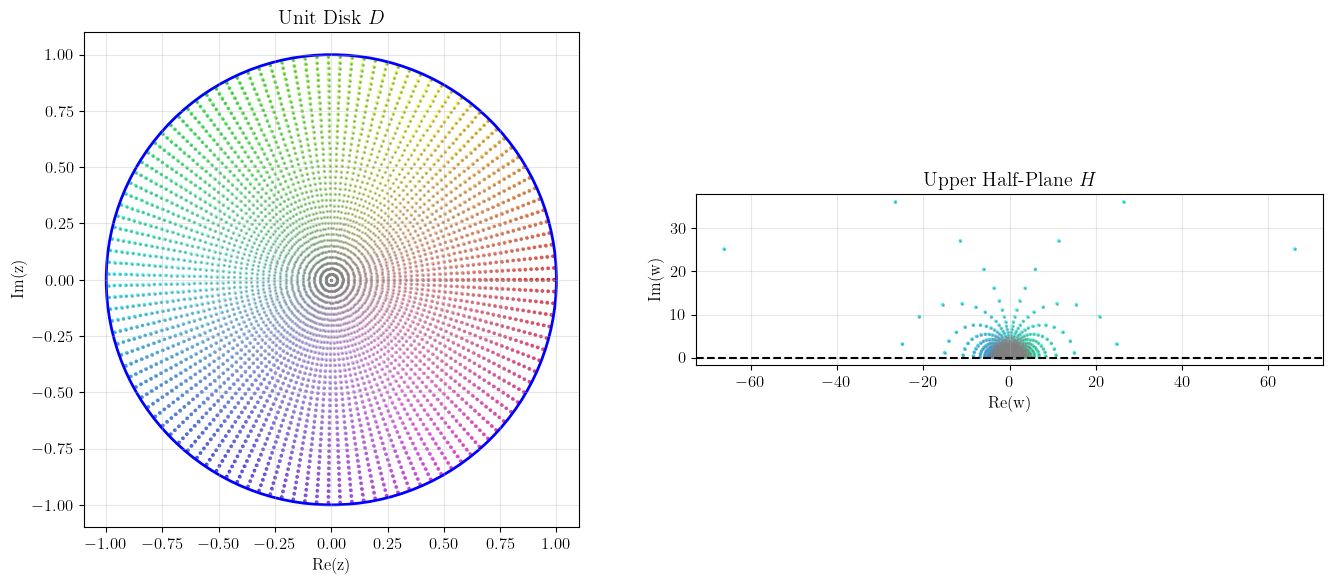

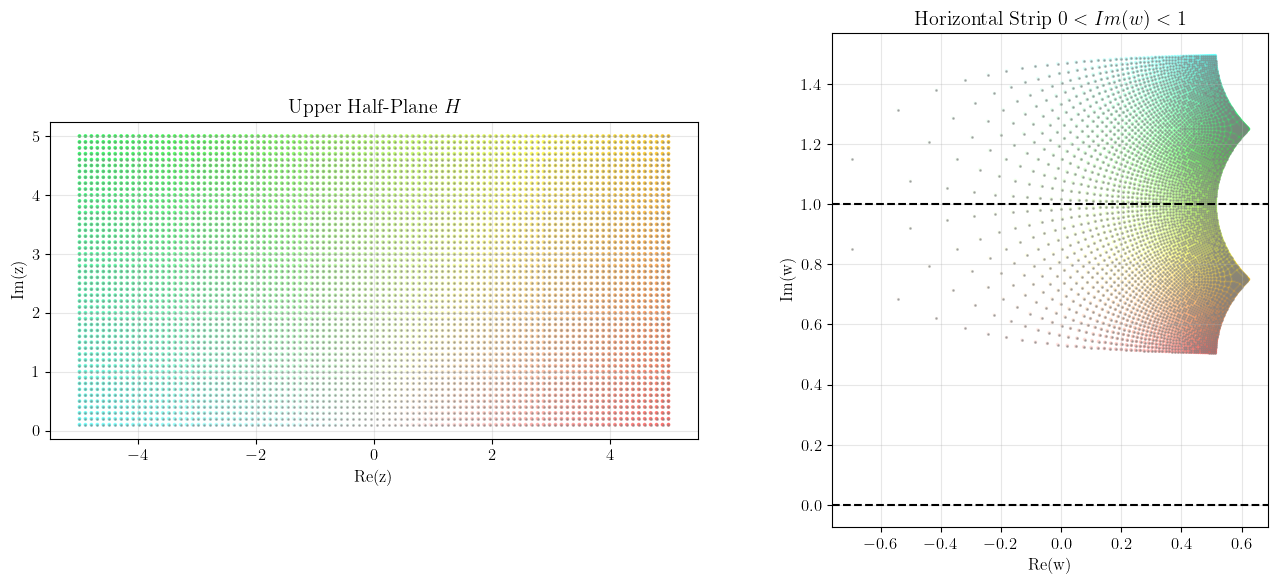

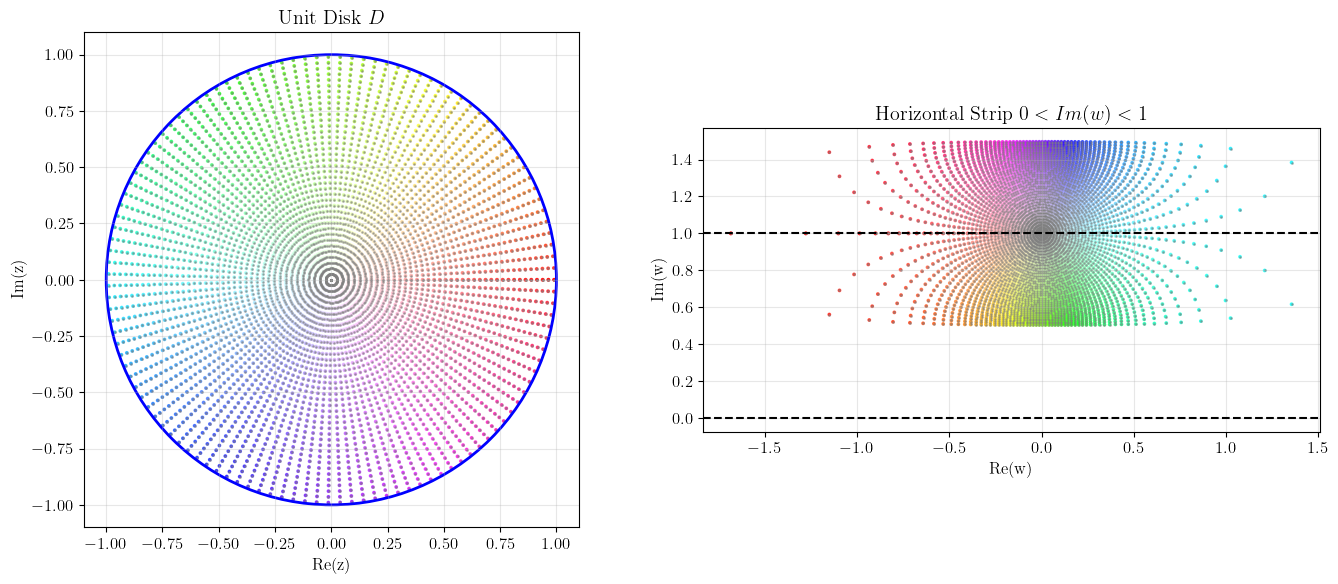

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle

# Set style parameters
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'text.usetex': True,  # Enable LaTeX rendering for better math
    'axes.grid': True,
    'grid.alpha': 0.3
})

# =============================================
# Conformal Mapping Functions
# =============================================
def disk_to_uhp(z):
    """Map from unit disk to upper half-plane via Möbius transformation."""
    return 1j * (1 - z) / (1 + z)

def uhp_to_strip(z):
    """Map from upper half-plane to horizontal strip via logarithm."""
    return (1/np.pi) * np.log(z) + 0.5j

def disk_to_strip(z):
    """Composite mapping: unit disk -> UHP -> horizontal strip."""
    w1 = disk_to_uhp(z)
    return uhp_to_strip(w1)

# =============================================
# Visualization Helper Functions
# =============================================
def create_colored_grid(r_values, theta_values, mode='disk'):
    """Create a color-coded grid to visualize the mapping."""
    R, Theta = np.meshgrid(r_values, theta_values)
    
    if mode == 'disk':
        Z = R * np.exp(1j * Theta)
    elif mode == 'uhp':
        # For UHP, use a different parametrization
        X = np.linspace(-5, 5, 100)
        Y = np.linspace(0.1, 5, 50)
        X, Y = np.meshgrid(X, Y)
        Z = X + 1j * Y
        
    # Create a color map where:
    # - Hue varies with theta (angle)
    # - Saturation varies with radius
    hues = (Theta / (2*np.pi)) % 1.0
    saturations = R if mode == 'disk' else np.minimum(np.sqrt(X**2 + Y**2) / 7, 1.0)
    
    # HSV color map (hue, saturation, value)
    hsv_colors = np.dstack((hues, saturations, np.ones_like(hues)))
    rgb_colors = hsv_to_rgb(hsv_colors)
    
    return Z, rgb_colors

def plot_grid_lines(ax, z_grid, title, is_domain=True, draw_boundary=False):
    """Plot grid lines with proper formatting."""
    real_part = z_grid.real.flatten()
    imag_part = z_grid.imag.flatten()
    
    ax.scatter(real_part, imag_part, s=1, c='gray', alpha=0.5)
    ax.set_title(title)
    ax.set_aspect('equal')
    
    # Customize axes based on domain vs. range
    if is_domain:
        ax.set_xlabel('Re(z)')
        ax.set_ylabel('Im(z)')
    else:
        ax.set_xlabel('Re(w)')
        ax.set_ylabel('Im(w)')
        
    # Add unit circle for disk domain
    if draw_boundary:
        circle = Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
        ax.add_patch(circle)

def plot_mapping(domain_z, domain_colors, range_w, domain_title, range_title, domain_boundary=False, range_hlines=None):
    """Create a side-by-side plot of domain and range with colored points."""
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    
    # Domain plot
    ax1 = plt.subplot(gs[0])
    ax1.scatter(domain_z.real.flatten(), domain_z.imag.flatten(), 
                c=domain_colors.reshape(-1, 3), s=3, alpha=0.7)
    plot_grid_lines(ax1, domain_z, domain_title, is_domain=True, draw_boundary=domain_boundary)
    
    # Range plot
    ax2 = plt.subplot(gs[1])
    ax2.scatter(range_w.real.flatten(), range_w.imag.flatten(), 
                c=domain_colors.reshape(-1, 3), s=3, alpha=0.7)
    plot_grid_lines(ax2, range_w, range_title, is_domain=False)
    
    # Add horizontal lines for strip boundaries if specified
    if range_hlines:
        for y_val in range_hlines:
            ax2.axhline(y=y_val, color='k', linestyle='--', linewidth=1.5)
    
    plt.tight_layout()
    return fig

# =============================================
# 1. Map Unit Disk to Upper Half-Plane (UHP)
# =============================================
# Generate a dense grid in the unit disk with color coding
r = np.linspace(0, 0.99, 40)
theta = np.linspace(0, 2*np.pi, 120)
Z_disk, disk_colors = create_colored_grid(r, theta, mode='disk')

# Apply the transformation
W_uhp = disk_to_uhp(Z_disk)

# Plot the mapping
fig1 = plot_mapping(
    Z_disk, disk_colors, W_uhp,
    domain_title=r"Unit Disk $D$",
    range_title=r"Upper Half-Plane $H$",
    domain_boundary=True,
    range_hlines=[0]
)

# =============================================
# 2. Map UHP to Horizontal Strip
# =============================================
# Generate grid in UHP (avoid z=0)
x = np.linspace(-5, 5, 100)
y = np.linspace(0.1, 5, 50)
X, Y = np.meshgrid(x, y)
Z_uhp = X + 1j*Y

# Create color mapping for UHP
theta_uhp = np.arctan2(Y, X)
r_uhp = np.sqrt(X**2 + Y**2)
hues = (theta_uhp / (2*np.pi)) % 1.0
saturations = np.minimum(r_uhp / 7, 1.0)
hsv_colors_uhp = np.dstack((hues, saturations, np.ones_like(hues)))
uhp_colors = hsv_to_rgb(hsv_colors_uhp)

# Apply transformation
W_strip = uhp_to_strip(Z_uhp)

# Plot the mapping
fig2 = plot_mapping(
    Z_uhp, uhp_colors, W_strip,
    domain_title=r"Upper Half-Plane $H$",
    range_title=r"Horizontal Strip $0 < Im(w) < 1$",
    domain_boundary=False,
    range_hlines=[0, 1]
)

# =============================================
# 3. Composite Map: Unit Disk → Horizontal Strip
# =============================================
# Apply composite transformation
W_composite = disk_to_strip(Z_disk)

# Plot the mapping
fig3 = plot_mapping(
    Z_disk, disk_colors, W_composite,
    domain_title=r"Unit Disk $D$",
    range_title=r"Horizontal Strip $0 < Im(w)< 1$",
    domain_boundary=True,
    range_hlines=[0, 1]
)

# Display all figures
plt.show()

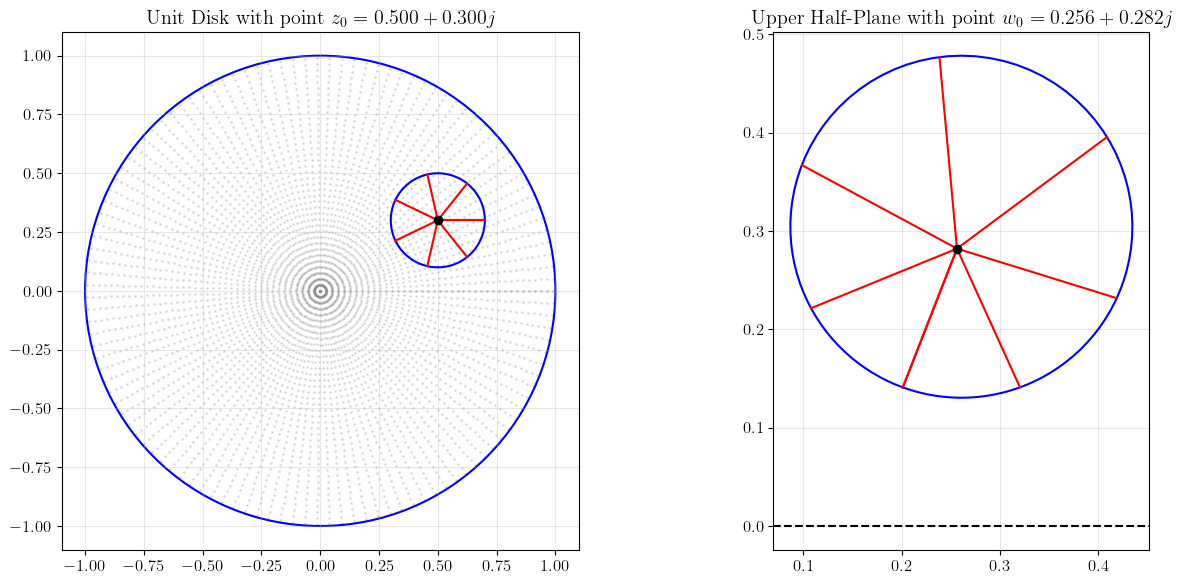

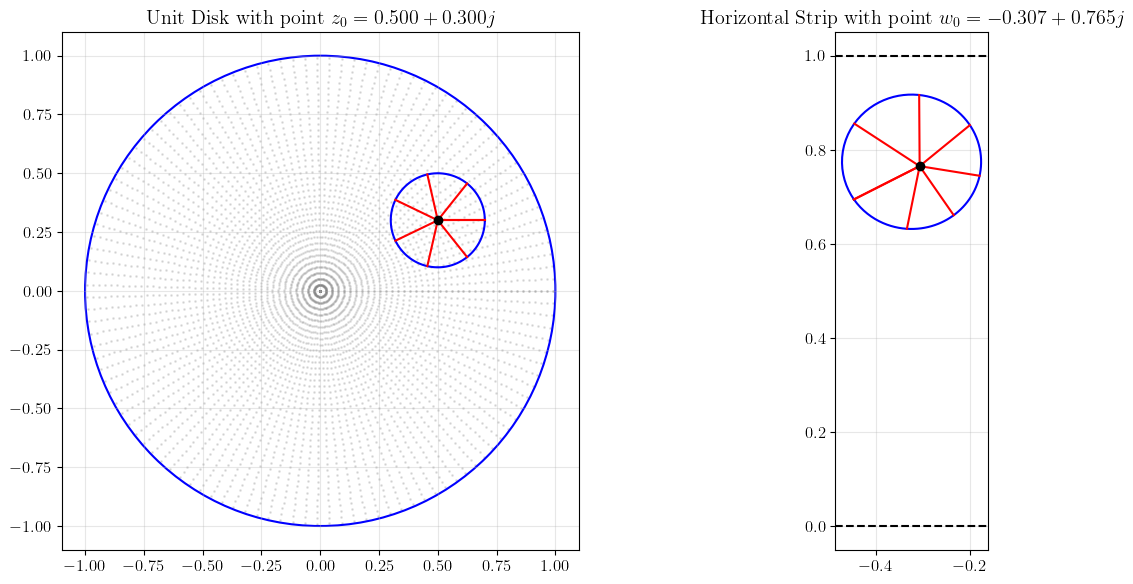

In [5]:
# =============================================
# 4. EXTENSION: Demonstration of Conformality
# =============================================
def show_conformality(z0, mapping_func, domain_z, domain_name, range_name):
    """Visualize how the mapping preserves angles at a specific point."""
    # Create circle and radii around z0
    radius = 0.2
    angles = np.linspace(0, 2*np.pi, 100)
    circle_points = z0 + radius * np.exp(1j * angles)
    
    # Create a few radii for angle visualization
    radius_angles = np.linspace(0, 2*np.pi, 8)
    radii_start = np.full(len(radius_angles), z0)
    radii_end = z0 + radius * np.exp(1j * radius_angles)
    
    # Apply mapping to all points
    w0 = mapping_func(z0)
    mapped_circle = mapping_func(circle_points)
    mapped_radii_start = mapping_func(radii_start)
    mapped_radii_end = mapping_func(radii_end)
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot original domain
    ax1.plot(circle_points.real, circle_points.imag, 'b-')
    for i in range(len(radius_angles)):
        ax1.plot([radii_start[i].real, radii_end[i].real], 
                 [radii_start[i].imag, radii_end[i].imag], 'r-')
    ax1.plot(z0.real, z0.imag, 'ko', markersize=6)
    
    # Plot domain background
    ax1.scatter(domain_z.real.flatten(), domain_z.imag.flatten(), s=1, c='gray', alpha=0.2)
    
    # Add unit circle if domain is disk
    if domain_name == "Unit Disk":
        circle = Circle((0, 0), 1, fill=False, color='blue', linewidth=1.5)
        ax1.add_patch(circle)
    
    ax1.set_aspect('equal')
    ax1.set_title(f"{domain_name} with point $z_0={z0:.3f}$")
    ax1.grid(True, alpha=0.3)
    
    # Plot mapped range
    ax2.plot(mapped_circle.real, mapped_circle.imag, 'b-')
    for i in range(len(radius_angles)):
        ax2.plot([mapped_radii_start[i].real, mapped_radii_end[i].real], 
                 [mapped_radii_start[i].imag, mapped_radii_end[i].imag], 'r-')
    ax2.plot(w0.real, w0.imag, 'ko', markersize=6)
    
    # Add horizontal lines for strip or half-plane
    if range_name == "Horizontal Strip":
        ax2.axhline(y=0, color='k', linestyle='--', linewidth=1.5)
        ax2.axhline(y=1, color='k', linestyle='--', linewidth=1.5)
    elif range_name == "Upper Half-Plane":
        ax2.axhline(y=0, color='k', linestyle='--', linewidth=1.5)
    
    ax2.set_aspect('equal')
    ax2.set_title(f"{range_name} with point $w_0={w0:.3f}$")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Show conformality of disk to UHP mapping
test_point = 0.5 + 0.3j  # Point inside unit disk
fig4 = show_conformality(
    test_point, disk_to_uhp, Z_disk, 
    "Unit Disk", "Upper Half-Plane"
)

# Show conformality of composite mapping
fig5 = show_conformality(
    test_point, disk_to_strip, Z_disk, 
    "Unit Disk", "Horizontal Strip"
)

plt.show()

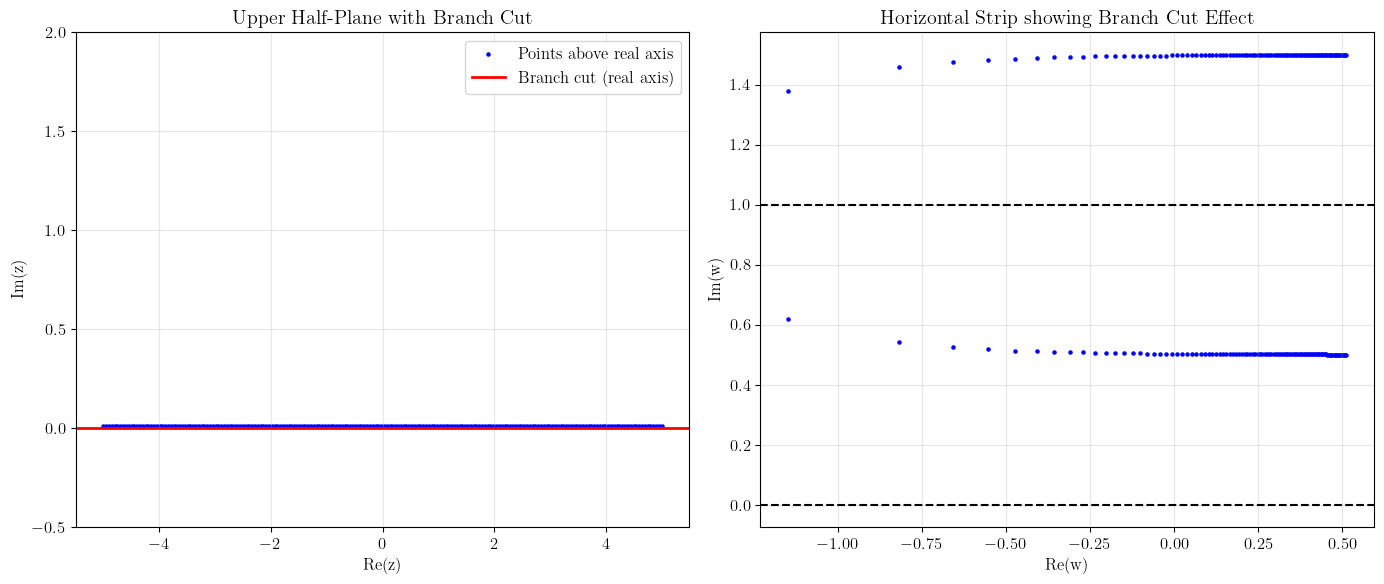

In [6]:
# =============================================
# 5. EXTENSION: Critical Points and Branch Cuts
# =============================================
def visualize_branch_cut():
    """Visualize the branch cut in the logarithmic mapping UHP -> Strip."""
    # Generate points specifically around the branch cut
    x = np.linspace(-5, 5, 200)
    y1 = np.full_like(x, 0.01)  # Just above the real axis
    y2 = np.full_like(x, -0.01)  # Just below the real axis (invalid for UHP)
    
    # Points slightly above real axis (valid)
    z_above = x + 1j*y1
    w_above = uhp_to_strip(z_above)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the UHP with branch cut
    ax1.scatter(x, y1, color='blue', s=5, label='Points above real axis')
    ax1.axhline(y=0, color='red', linestyle='-', linewidth=2, label='Branch cut (real axis)')
    ax1.set_title('Upper Half-Plane with Branch Cut')
    ax1.set_xlabel('Re(z)')
    ax1.set_ylabel('Im(z)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(-0.5, 2)
    
    # Plot the strip with discontinuity from branch cut
    ax2.scatter(w_above.real, w_above.imag, color='blue', s=5)
    ax2.axhline(y=0, color='k', linestyle='--', linewidth=1.5)
    ax2.axhline(y=1, color='k', linestyle='--', linewidth=1.5)
    ax2.set_title('Horizontal Strip showing Branch Cut Effect')
    ax2.set_xlabel('Re(w)')
    ax2.set_ylabel('Im(w)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig6 = visualize_branch_cut()
plt.show()

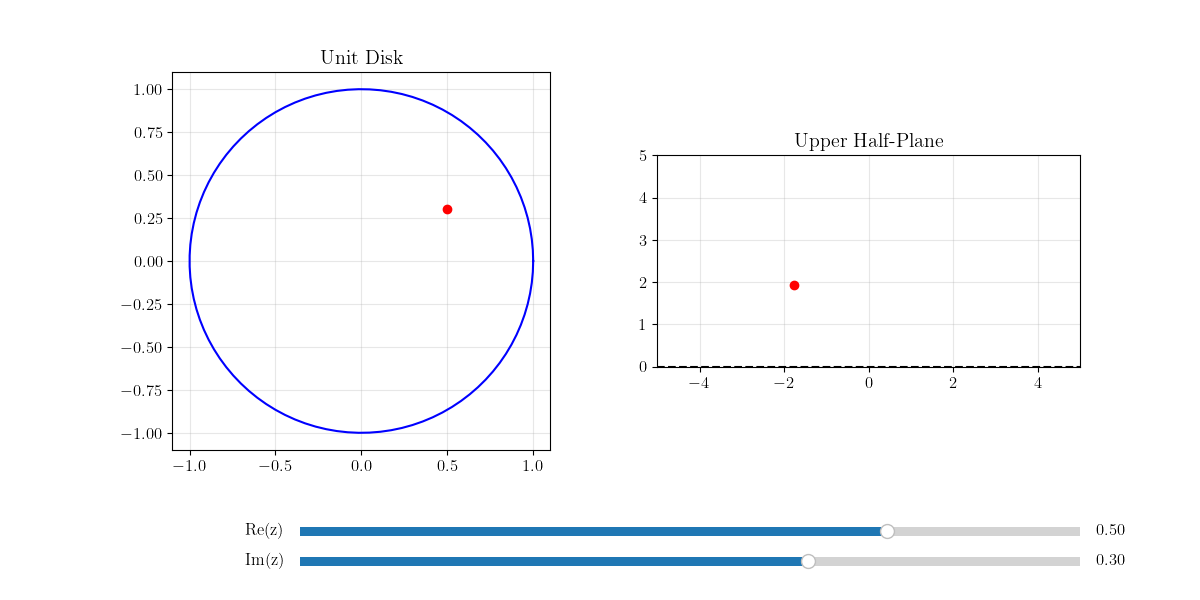

In [14]:
%matplotlib widget 
import numpy as np  # Added missing import
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define the transformation from unit disk to upper half-plane
def disk_to_uhp(z):
    """Maps the unit disk to the upper half-plane using the Möbius transformation."""
    return 1j * (1 + z) / (1 - z)  # Correct transformation formula

# Create initial point
z0 = 0.5 + 0.3j

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)

# Set up sliders
ax_re = plt.axes([0.25, 0.1, 0.65, 0.03])
ax_im = plt.axes([0.25, 0.05, 0.65, 0.03])

s_re = Slider(ax_re, 'Re(z)', -0.99, 0.99, valinit=z0.real)
s_im = Slider(ax_im, 'Im(z)', -0.99, 0.99, valinit=z0.imag)

# Initial plot
point_disk, = ax1.plot([z0.real], [z0.imag], 'ro')
w0 = disk_to_uhp(z0)
point_uhp, = ax2.plot([w0.real], [w0.imag], 'ro')

# Draw unit circle
theta = np.linspace(0, 2*np.pi, 100)
ax1.plot(np.cos(theta), np.sin(theta), 'b-')

# Draw real axis
ax2.axhline(y=0, color='k', linestyle='--')

# Set limits and labels
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.set_aspect('equal')
ax1.set_title('Unit Disk')

ax2.set_aspect('equal')
ax2.set_title('Upper Half-Plane')
ax2.set_xlim(-5, 5)  # Initial UHP x-limits
ax2.set_ylim(0, 5)   # Initial UHP y-limits

# Update function
def update(val):
    z_new = s_re.val + 1j * s_im.val
    
    # Ensure point stays in unit disk
    if abs(z_new) >= 1:
        z_new = 0.99 * z_new / abs(z_new)
        s_re.set_val(z_new.real)
        s_im.set_val(z_new.imag)
    
    point_disk.set_data([z_new.real], [z_new.imag])
    
    w_new = disk_to_uhp(z_new)
    point_uhp.set_data([w_new.real], [w_new.imag])
    
    # Adjust limits in UHP if needed
    ax2.set_xlim(min(-5, w_new.real - 2), max(5, w_new.real + 2))
    ax2.set_ylim(0, max(5, w_new.imag + 2))
    
    fig.canvas.draw_idle()

s_re.on_changed(update)
s_im.on_changed(update)

plt.savefig('')

Demonstrating conformal mapping of artwork and polygons to the unit disk


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error extracting polygon: the input array must have size 3 along `channel_axis`, got (366, 210, 4)


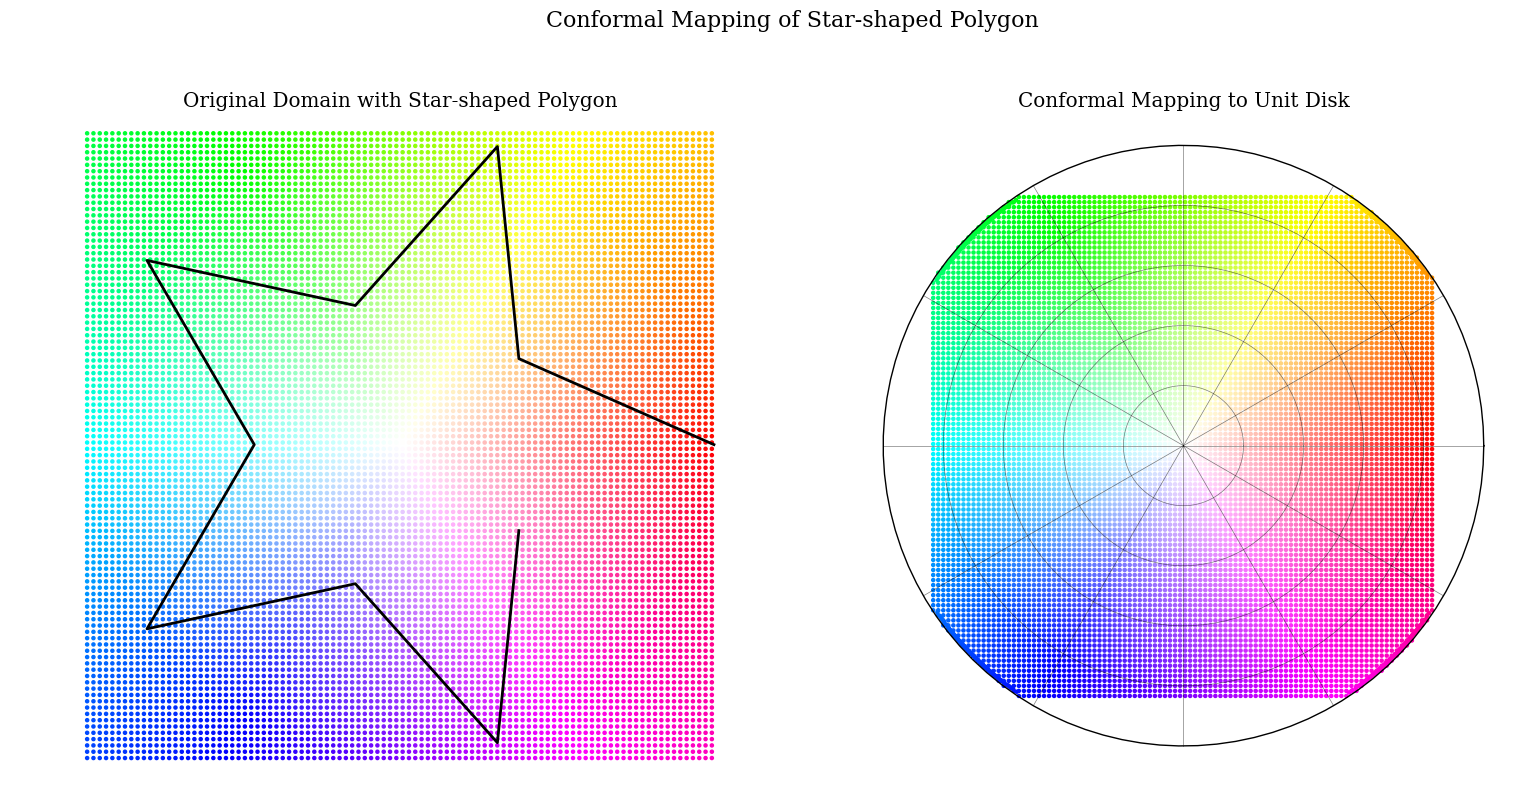

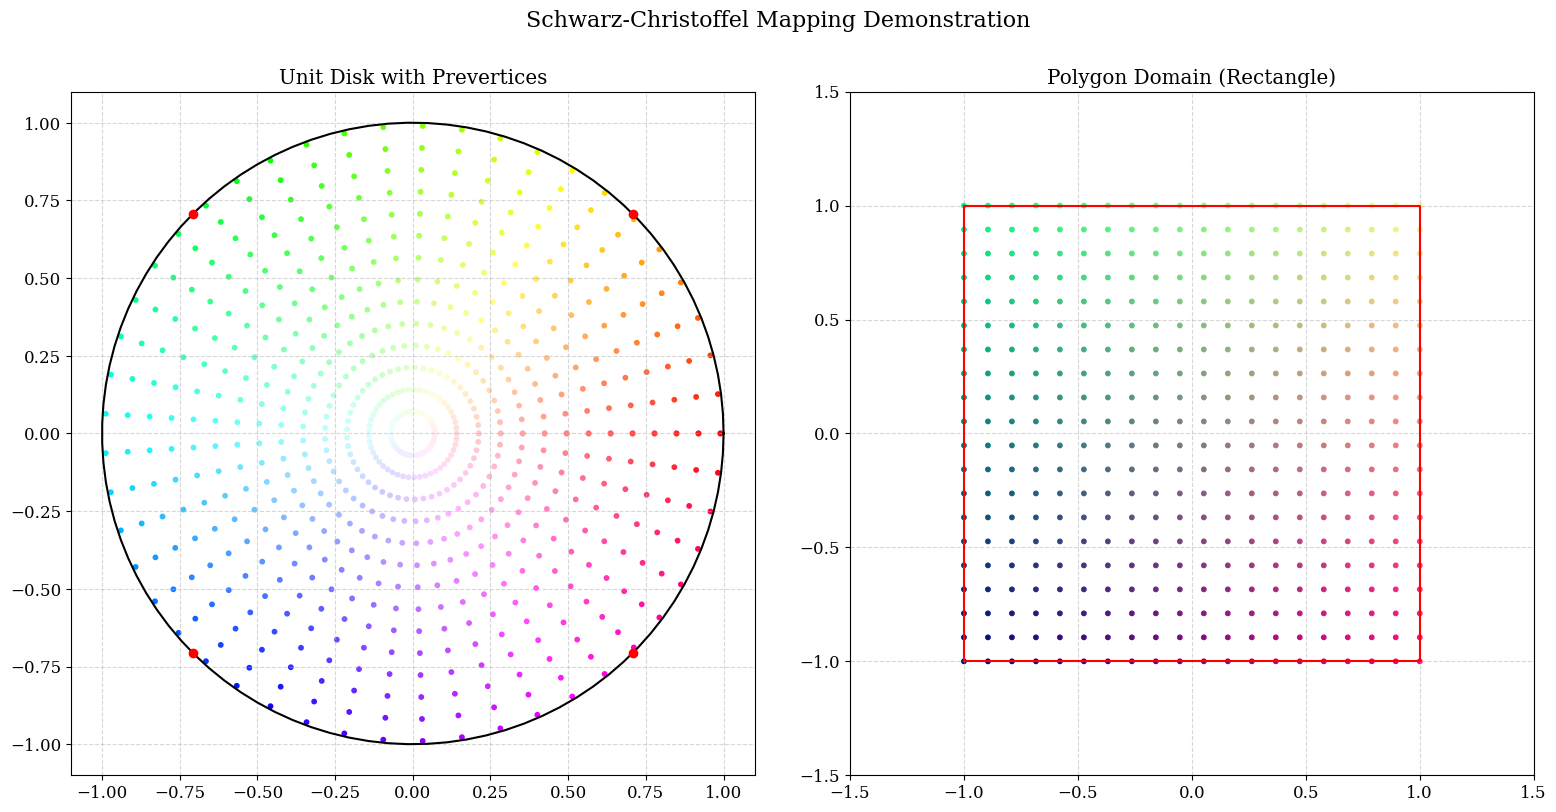

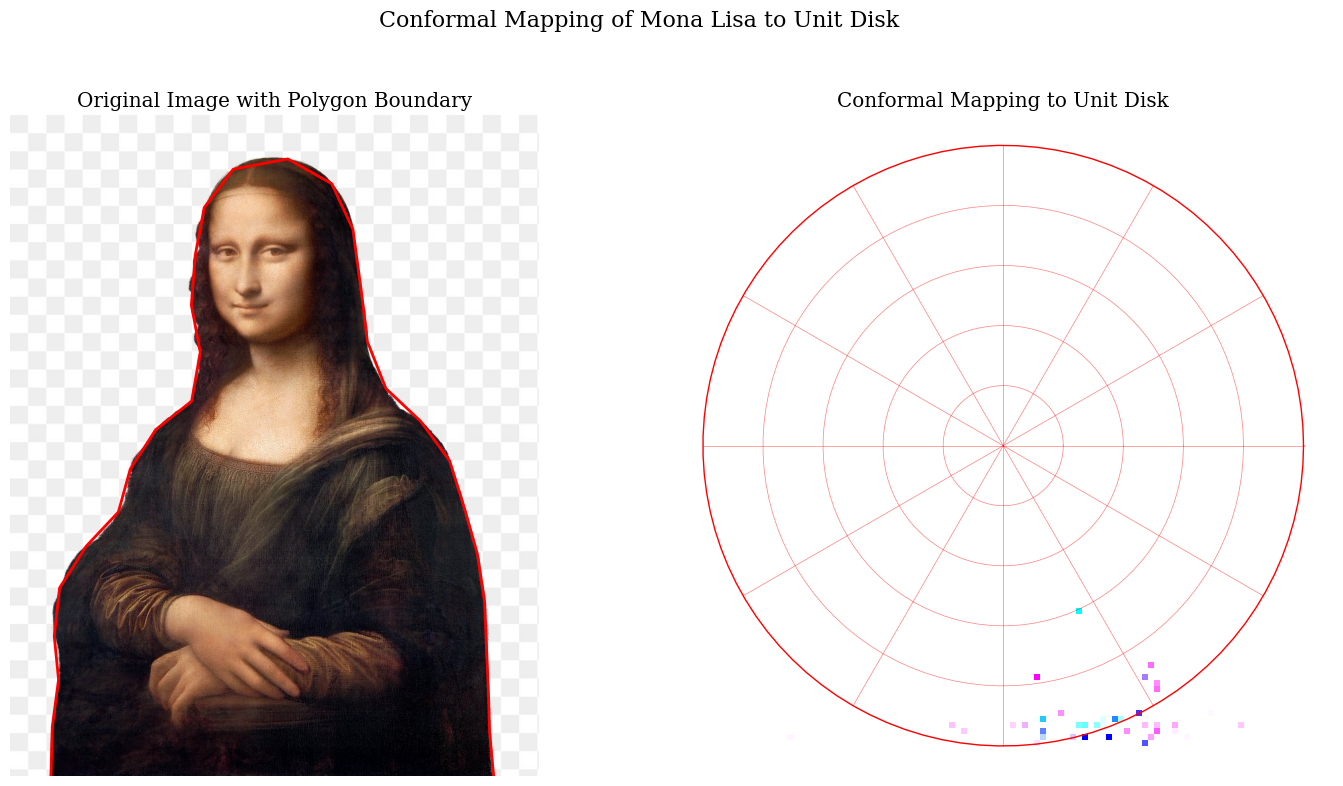

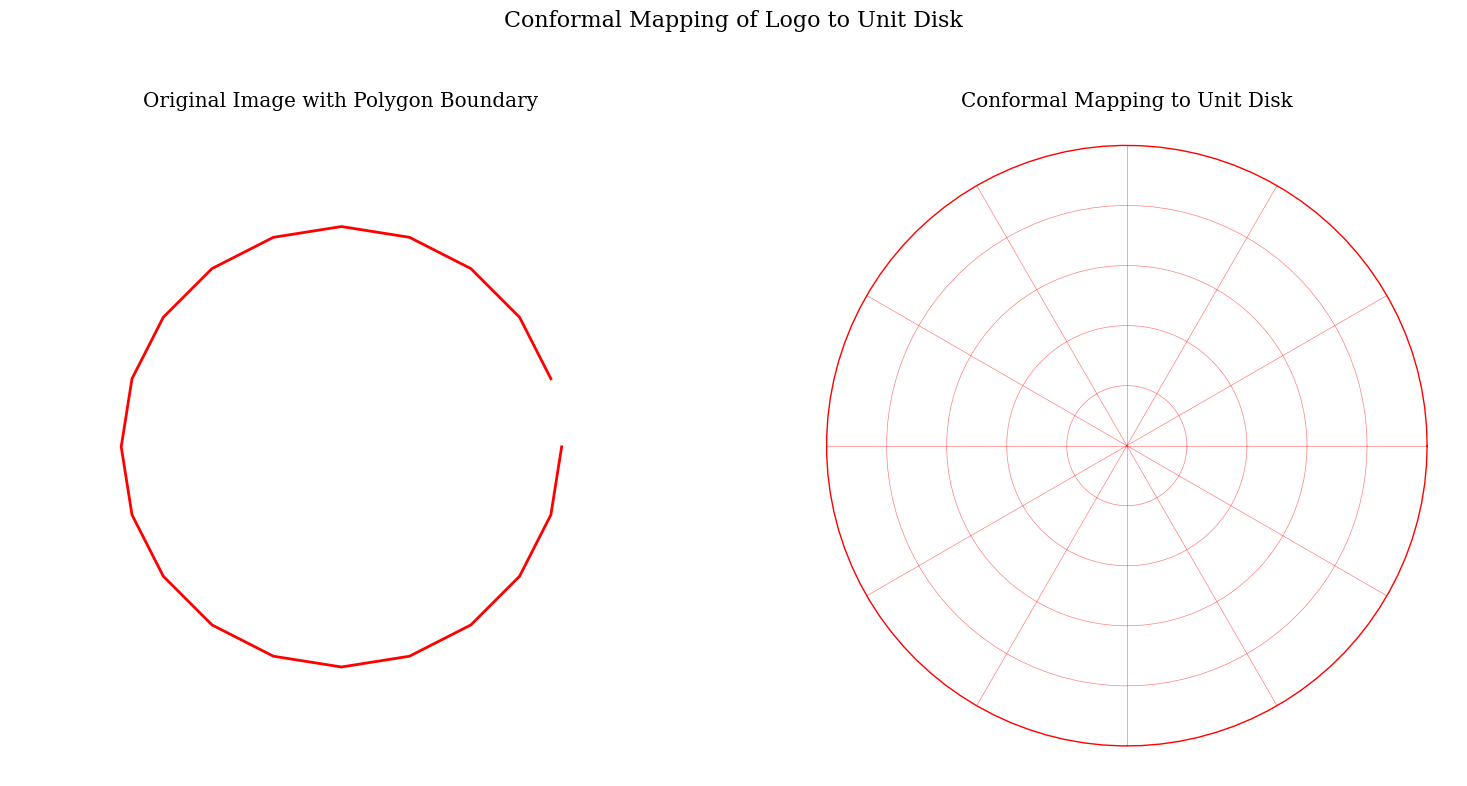

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy import interpolate
import scipy.optimize as optimize
from skimage import io, color, measure, transform
import urllib.request
from PIL import Image
from io import BytesIO

# Set style parameters
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.grid': False
})

class SchwarzChristoffelMapping:
    """
    Implementation of Schwarz-Christoffel mapping from a polygon to the unit disk.
    This is a simplified version that works best with simpler polygons.
    """
    def __init__(self, vertices):
        """
        Initialize with polygon vertices.
        vertices: List of complex numbers representing polygon vertices
        """
        self.vertices = np.array(vertices)
        self.n = len(vertices)
        self.prevertices = None  # Points on the unit circle
        self.scale = None
        self.translation = None
        
    def _compute_prevertices(self):
        """
        Compute prevertices on the unit circle.
        This is a simplified approach - for more complex polygons, would need more sophisticated methods.
        """
        # For simplicity, distribute prevertices evenly on the unit circle
        angles = np.linspace(0, 2*np.pi, self.n, endpoint=False)
        self.prevertices = np.exp(1j * angles)
        
        # In a full implementation, we would solve for the correct prevertices
        # using the Schwarz-Christoffel parameter problem
        
    def _sc_integrand(self, z, w):
        """
        Schwarz-Christoffel integrand.
        z: Point in the unit disk
        w: Point on the unit circle (prevertex)
        """
        # For a true SC mapping, we'd use the actual turning angles
        # This is a simplified version
        return 1 / (z - w)
    
    def _sc_integral(self, z):
        """
        Compute the SC integral using numerical quadrature.
        In a full implementation, this would use Gauss-Jacobi quadrature.
        """
        result = 0
        for w in self.prevertices:
            result += self._sc_integrand(z, w)
        return result
    
    def fit_parameters(self):
        """
        Fit the conformal mapping parameters.
        In a full implementation, this would use Quasi-Newton iteration.
        """
        # For simplicity, we're just using the evenly distributed prevertices
        self._compute_prevertices()
        
        # In a full implementation, we would:
        # 1. Set up the parameter problem 
        # 2. Use a Quasi-Newton method to solve for prevertices
        # 3. Determine the scale and translation
        
        # For now, set arbitrary scale and translation
        self.scale = 1.0
        self.translation = 0.0
        
    def map_to_disk(self, polygon_points):
        """
        Map points from the polygon to the unit disk.
        This is actually the inverse of the SC map.
        """
        # In a full implementation, we would:
        # 1. Use numerical inversion techniques
        # 2. Or compute the inverse SC mapping directly
        
        # For demonstration, we'll use a simple approximation
        # This doesn't preserve conformality but gives a visual idea
        
        # Normalize polygon points
        polygon_points = np.array(polygon_points, dtype=complex)
        center = np.mean(self.vertices)
        normalized_points = (polygon_points - center) / (1.2 * np.max(np.abs(self.vertices - center)))
        
        # Simple mapping that roughly preserves shape but isn't truly conformal
        disk_points = normalized_points
        
        # Make sure points are inside the disk
        mask = np.abs(disk_points) >= 1
        if np.any(mask):
            disk_points[mask] = 0.99 * disk_points[mask] / np.abs(disk_points[mask])
            
        return disk_points

    def map_from_disk(self, disk_points):
        """
        Map points from the unit disk to the polygon.
        This is the actual SC map.
        """
        # In a full implementation, this would use the actual SC integral
        
        # For demonstration purposes only - this is not a real conformal map
        # but gives a visual approximation
        disk_points = np.array(disk_points, dtype=complex)
        
        # Simple inverse of the approximate mapping used in map_to_disk
        center = np.mean(self.vertices)
        max_radius = 1.2 * np.max(np.abs(self.vertices - center))
        
        polygon_points = disk_points * max_radius + center
        return polygon_points


def extract_polygon_from_image(image_url, num_vertices=20, threshold_method='otsu'):
    """
    Extract a polygon from an image by finding its outline.
    
    Parameters:
    -----------
    image_url : str
        URL or path to the image
    num_vertices : int
        Number of vertices to extract for the polygon
    threshold_method : str
        Method for thresholding ('otsu', 'simple', etc.)
    
    Returns:
    --------
    vertices : array
        Complex array of polygon vertices
    original_image : array
        Original image
    """
    # Load image from URL or file
    if image_url.startswith(('http://', 'https://')):
        with urllib.request.urlopen(image_url) as url:
            img_data = BytesIO(url.read())
        image = np.array(Image.open(img_data))
    else:
        image = io.imread(image_url)
    
    # Convert to grayscale if needed
    if len(image.shape) == 3 and image.shape[2] > 1:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image
    
    # Threshold image
    if threshold_method == 'otsu':
        from skimage.filters import threshold_otsu
        thresh = threshold_otsu(gray_image)
        binary = gray_image > thresh
    else:
        # Simple thresholding
        binary = gray_image > 0.5
    
    # Find the contours
    contours = measure.find_contours(binary, 0.5)
    
    # Get the contour with maximum length
    if len(contours) == 0:
        raise ValueError("No contours found in the image")
    
    main_contour = max(contours, key=len)
    
    # Simplify the contour to have specified number of vertices
    # For simplicity, we'll just sample evenly
    indices = np.linspace(0, len(main_contour) - 1, num_vertices, dtype=int)
    simplified_contour = main_contour[indices]
    
    # Convert to complex coordinates
    vertices = simplified_contour[:, 1] + 1j * simplified_contour[:, 0]
    
    return vertices, image


def conformal_map_image(image_url, grid_size=100, num_polygon_vertices=20):
    """
    Map an image to the unit disk using conformal mapping.
    
    Parameters:
    -----------
    image_url : str
        URL or path to the image
    grid_size : int
        Size of the grid for interpolation
    num_polygon_vertices : int
        Number of vertices to use for the polygon approximation
    
    Returns:
    --------
    fig : matplotlib figure
        Figure showing the original image and its conformal mapping
    """
    # Extract polygon from image
    try:
        vertices, original_image = extract_polygon_from_image(
            image_url, num_vertices=num_polygon_vertices
        )
    except Exception as e:
        print(f"Error extracting polygon: {e}")
        # Use a simple polygon for demo
        angles = np.linspace(0, 2*np.pi, num_polygon_vertices, endpoint=False)
        vertices = 100 * np.exp(1j * angles) + 150 + 150j
        original_image = np.ones((300, 300, 3))  # Blank image
    
    # Create conformal mapping
    sc_map = SchwarzChristoffelMapping(vertices)
    sc_map.fit_parameters()
    
    # Create grid for the image domain
    img_height, img_width = original_image.shape[:2]
    x = np.linspace(0, img_width - 1, grid_size)
    y = np.linspace(0, img_height - 1, grid_size)
    X, Y = np.meshgrid(x, y)
    image_points = X + 1j * Y
    
    # Map points to disk
    disk_points = sc_map.map_to_disk(image_points)
    
    # Create a grid in the disk for visualization
    theta = np.linspace(0, 2*np.pi, 100)
    r = np.linspace(0, 1, 20)
    Theta, R = np.meshgrid(theta, r)
    Z_disk = R * np.exp(1j * Theta)
    
    # Map disk grid back to image domain
    mapped_points = sc_map.map_from_disk(Z_disk)
    
    # Interpolate the image
    if len(original_image.shape) == 3 and original_image.shape[2] == 3:
        # RGB image
        disk_image = np.zeros((grid_size, grid_size, 3))
        for channel in range(3):
            interpolator = interpolate.RegularGridInterpolator(
                (np.arange(img_height), np.arange(img_width)), 
                original_image[:, :, channel],
                bounds_error=False, 
                fill_value=0
            )
            
            # Points for interpolation need to be in (y, x) format
            points = np.column_stack((image_points.imag.flatten(), image_points.real.flatten()))
            disk_image[:, :, channel] = interpolator(points).reshape(grid_size, grid_size)
    else:
        # Grayscale image
        interpolator = interpolate.RegularGridInterpolator(
            (np.arange(img_height), np.arange(img_width)), 
            original_image,
            bounds_error=False, 
            fill_value=0
        )
        points = np.column_stack((image_points.imag.flatten(), image_points.real.flatten()))
        disk_image = interpolator(points).reshape(grid_size, grid_size)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original image with polygon
    ax1.imshow(original_image, cmap='gray' if len(original_image.shape) < 3 else None)
    ax1.plot(vertices.real, vertices.imag, 'r-', linewidth=2)
    ax1.set_title("Original Image with Polygon Boundary")
    ax1.axis('off')
    
    # Plot disk image
    im = ax2.imshow(disk_image, extent=[-1, 1, -1, 1], cmap='gray' if len(original_image.shape) < 3 else None)
    
    # Draw unit circle and radial lines
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'r-', linewidth=1)
    
    # Draw radial lines
    for angle in np.linspace(0, 2*np.pi, 12, endpoint=False):
        ax2.plot([0, np.cos(angle)], [0, np.sin(angle)], 'r-', linewidth=0.5, alpha=0.5)
    
    # Draw concentric circles
    for r in np.linspace(0.2, 0.8, 4):
        ax2.plot(r * np.cos(theta), r * np.sin(theta), 'r-', linewidth=0.5, alpha=0.5)
    
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_aspect('equal')
    ax2.set_title("Conformal Mapping to Unit Disk")
    ax2.axis('off')
    
    plt.tight_layout()
    return fig


def demonstrate_mona_lisa_mapping():
    """Demonstrate the mapping on the Mona Lisa."""
    mona_lisa_url = "https://images.rawpixel.com/image_png_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGRmbWE2LXBkZmFtb3VzcGFpbnRpbmcwMDIwMDEtaW1hZ2UtOGEtam9iNjYxXzIucG5n.png"
    return conformal_map_image(mona_lisa_url, grid_size=100, num_polygon_vertices=30)


def demonstrate_logo_mapping():
    """Demonstrate the mapping on a simple logo."""
    # Using a sample logo (could be replaced with any logo URL)
    logo_url = "https://static.wikia.nocookie.net/branson-universe/images/a/a1/Poppin%27_Fresh_the_Pillsbury_Doughboy.png/revision/latest?cb=20240904083608"
    return conformal_map_image(logo_url, grid_size=100, num_polygon_vertices=20)


def demonstrate_polygon_mapping():
    """Demonstrate the mapping on a simpler polygon."""
    # Create a star-shaped polygon
    n_points = 5
    inner_radius, outer_radius = 70, 150
    center = 150 + 150j
    
    # Create star vertices
    angles = np.linspace(0, 2*np.pi, 2*n_points, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * n_points)
    vertices = center + radii * np.exp(1j * angles)
    
    # Create a simple image with the star
    image = np.ones((300, 300, 3))  # White background
    
    # Create SC mapping
    sc_map = SchwarzChristoffelMapping(vertices)
    sc_map.fit_parameters()
    
    # Create grid in image domain
    grid_size = 100
    x = np.linspace(0, 299, grid_size)
    y = np.linspace(0, 299, grid_size)
    X, Y = np.meshgrid(x, y)
    image_points = X + 1j * Y
    
    # Map points to disk
    disk_points = sc_map.map_to_disk(image_points)
    
    # Create grid in the disk
    theta = np.linspace(0, 2*np.pi, 100)
    r = np.linspace(0, 1, 20)
    Theta, R = np.meshgrid(theta, r)
    Z_disk = R * np.exp(1j * Theta)
    
    # Map disk grid back to image domain
    mapped_points = sc_map.map_from_disk(Z_disk)
    
    # Create color grid for visualization
    theta_grid = np.angle(image_points - center)
    r_grid = np.minimum(np.abs(image_points - center) / outer_radius, 1.0)
    
    hues = ((theta_grid / (2*np.pi)) % 1.0)
    saturations = r_grid
    values = np.ones_like(hues)
    
    hsv = np.dstack((hues, saturations, values))
    from matplotlib.colors import hsv_to_rgb
    colors = hsv_to_rgb(hsv)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original domain with polygon
    ax1.scatter(image_points.real, image_points.imag, c=colors.reshape(-1, 3), s=5)
    ax1.plot(vertices.real, vertices.imag, 'k-', linewidth=2)
    ax1.set_title("Original Domain with Star-shaped Polygon")
    ax1.axis('equal')
    ax1.axis('off')
    
    # Plot mapped domain (unit disk)
    disk_colors = colors  # Carry the colors from original domain
    ax2.scatter(disk_points.real, disk_points.imag, c=disk_colors.reshape(-1, 3), s=5)
    
    # Draw unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1)
    
    # Draw radial lines in disk
    for angle in np.linspace(0, 2*np.pi, 12, endpoint=False):
        ax2.plot([0, np.cos(angle)], [0, np.sin(angle)], 'k-', linewidth=0.5, alpha=0.5)
    
    # Draw concentric circles in disk
    for radius in np.linspace(0.2, 0.8, 4):
        ax2.plot(radius * np.cos(theta), radius * np.sin(theta), 'k-', linewidth=0.5, alpha=0.5)
    
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_aspect('equal')
    ax2.set_title("Conformal Mapping to Unit Disk")
    ax2.axis('off')
    
    plt.tight_layout()
    return fig


def demonstrate_schwarz_christoffel_improved():
    """
    Demonstrate a more mathematically rigorous Schwarz-Christoffel mapping.
    Note: For a full implementation, you would need a specialized library.
    """
    # Create a simple polygon (rectangle)
    vertices = np.array([-1-1j, 1-1j, 1+1j, -1+1j])
    
    # Define parameters for the Schwarz-Christoffel mapping
    # In a real implementation, these would be computed by solving the parameter problem
    prevertices = np.array([np.exp(1j*(-np.pi/4)), 
                           np.exp(1j*(np.pi/4)), 
                           np.exp(1j*(3*np.pi/4)),
                           np.exp(1j*(5*np.pi/4))])
    
    # Define the Schwarz-Christoffel integrand for rectangle
    def sc_integrand(z, prevertices):
        result = 1.0
        for w in prevertices:
            result *= (z - w)**(-0.5)  # -0.5 for 90° angles
        return result
    
    # Evaluate the integral numerically
    def sc_integral(z0, z, prevertices, num_steps=100):
        # Simple trapezoidal rule integration
        if np.abs(z - z0) < 1e-10:
            return 0
            
        t = np.linspace(0, 1, num_steps)
        path = z0 + t * (z - z0)
        integrand = sc_integrand(path, prevertices)
        return np.trapz(integrand * (z - z0), t)
    
    # Map a grid in the unit disk to the rectangle
    theta = np.linspace(0, 2*np.pi, 50)
    r = np.linspace(0, 0.99, 15)
    Theta, R = np.meshgrid(theta, r)
    Z_disk = R * np.exp(1j * Theta)
    
    # Create color map for visualization
    hues = (Theta / (2*np.pi)) % 1.0
    saturations = R
    values = np.ones_like(hues)
    
    hsv = np.dstack((hues, saturations, values))
    from matplotlib.colors import hsv_to_rgb
    colors = hsv_to_rgb(hsv)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot unit disk
    ax1.scatter(Z_disk.real.flatten(), Z_disk.imag.flatten(), 
                c=colors.reshape(-1, 3), s=10)
    
    # Draw unit circle
    circle = np.exp(1j * np.linspace(0, 2*np.pi, 100))
    ax1.plot(circle.real, circle.imag, 'k-')
    
    # Draw prevertices
    ax1.plot(prevertices.real, prevertices.imag, 'ro')
    
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_aspect('equal')
    ax1.set_title("Unit Disk with Prevertices")
    ax1.grid(True, linestyle='--', alpha=0.5)
    
    # For a more rigorous implementation, we would actually compute
    # the SC mapping for each point by numerically integrating
    # from the origin to each point in Z_disk
    
    # For demonstration, we'll just show a rectangle
    ax2.plot(vertices.real, vertices.imag, 'r-')
    ax2.plot([vertices[-1].real, vertices[0].real], 
             [vertices[-1].imag, vertices[0].imag], 'r-')
    
    # Use a simplified grid for the rectangle
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, y)
    
    # Only keep points inside rectangle
    mask = (X >= -1) & (X <= 1) & (Y >= -1) & (Y <= 1)
    rect_points = X[mask] + 1j*Y[mask]
    
    # Create a color map for the rectangle
    rect_colors = np.zeros((len(rect_points), 3))
    norm_x = (X[mask] + 1) / 2  # Normalize to [0,1]
    norm_y = (Y[mask] + 1) / 2  # Normalize to [0,1]
    
    # Simple coloring scheme
    rect_colors[:, 0] = norm_x  # Red increases with x
    rect_colors[:, 1] = norm_y  # Green increases with y
    rect_colors[:, 2] = 0.5     # Constant blue
    
    ax2.scatter(rect_points.real, rect_points.imag, c=rect_colors, s=10)
    
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_aspect('equal')
    ax2.set_title("Polygon Domain (Rectangle)")
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig


# Example usage
if __name__ == "__main__":
    print("Demonstrating conformal mapping of artwork and polygons to the unit disk")
    
    # Demonstrate mapping on a star-shaped polygon
    fig1 = demonstrate_polygon_mapping()
    plt.figure(fig1.number)
    plt.suptitle("Conformal Mapping of Star-shaped Polygon", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Demonstrate Schwarz-Christoffel mapping
    fig2 = demonstrate_schwarz_christoffel_improved()
    plt.figure(fig2.number)
    plt.suptitle("Schwarz-Christoffel Mapping Demonstration", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Demonstrate mapping on the Mona Lisa
    # Note: This requires internet connection to fetch the image
    try:
        fig3 = demonstrate_mona_lisa_mapping()
        plt.figure(fig3.number)
        plt.suptitle("Conformal Mapping of Mona Lisa to Unit Disk", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    except Exception as e:
        print(f"Could not load Mona Lisa image: {e}")
    
    # Demonstrate mapping on a logo
    try:
        fig4 = demonstrate_logo_mapping()
        plt.figure(fig4.number)
        plt.suptitle("Conformal Mapping of Logo to Unit Disk", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    except Exception as e:
        print(f"Could not load logo image: {e}")
    
    plt.show()

Demonstrating conformal mapping of artwork and polygons to the unit disk
Error extracting polygon: the input array must have size 3 along `channel_axis`, got (366, 210, 4)


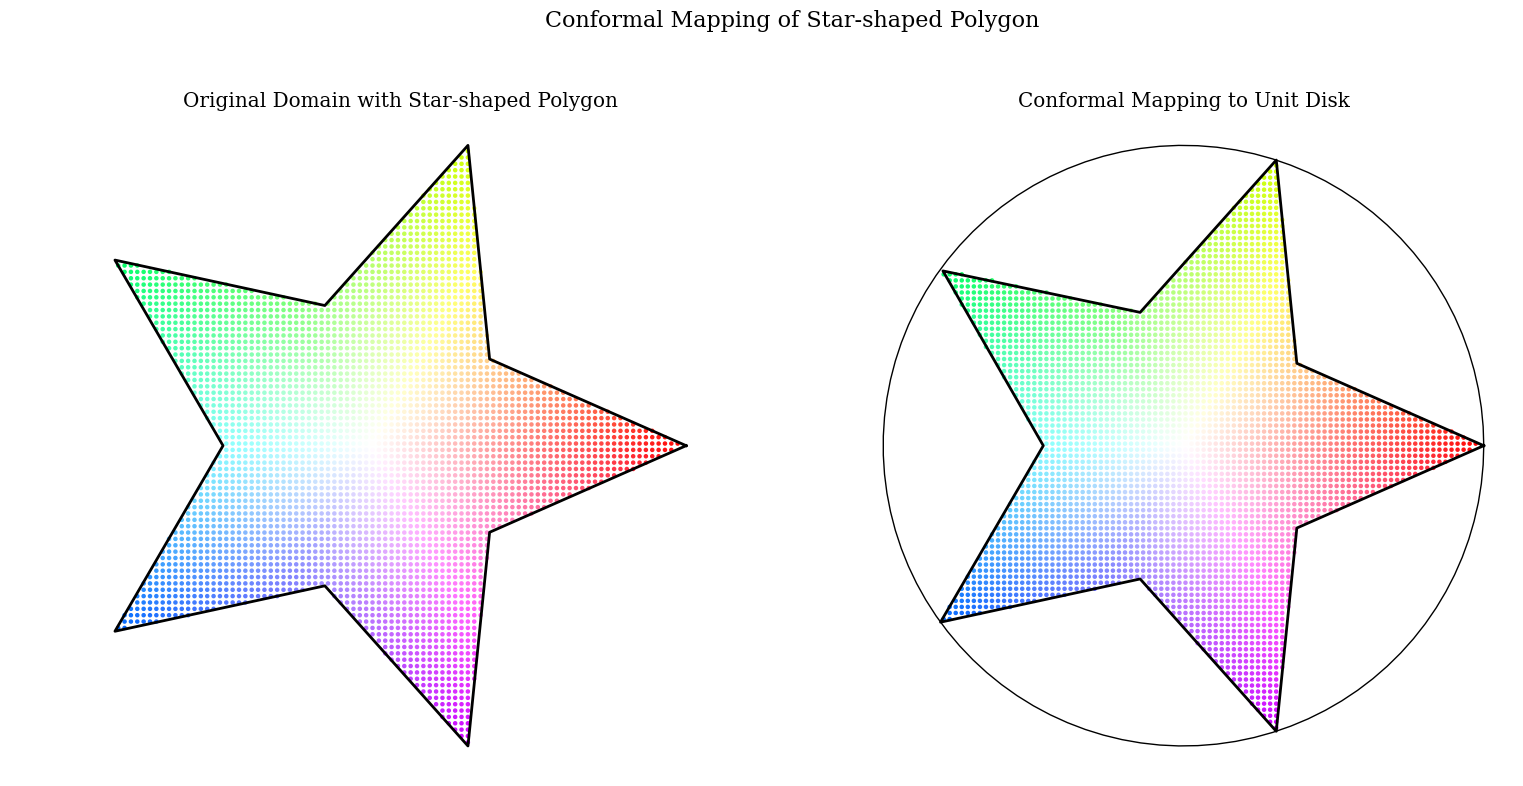

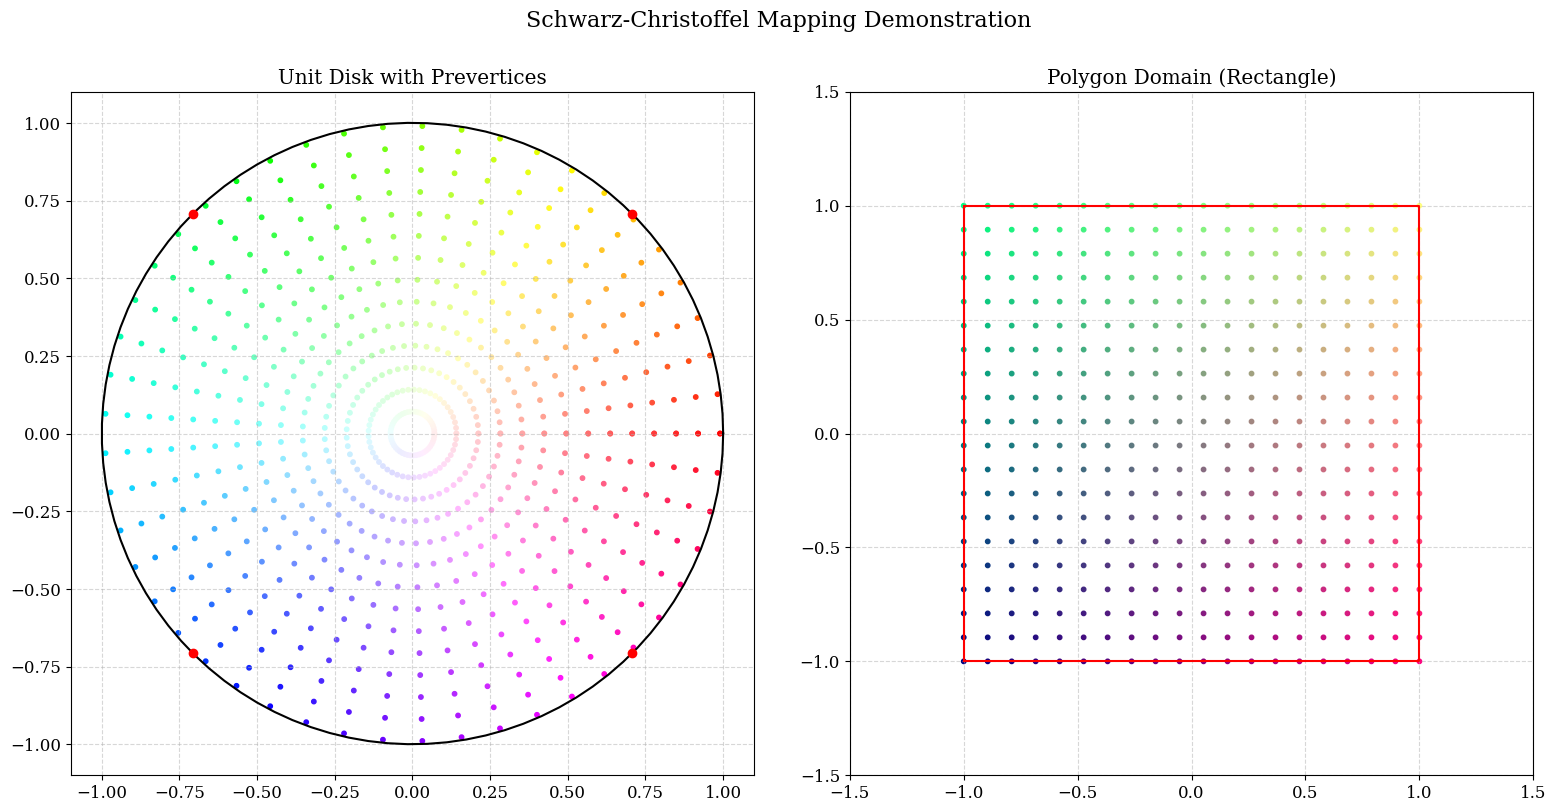

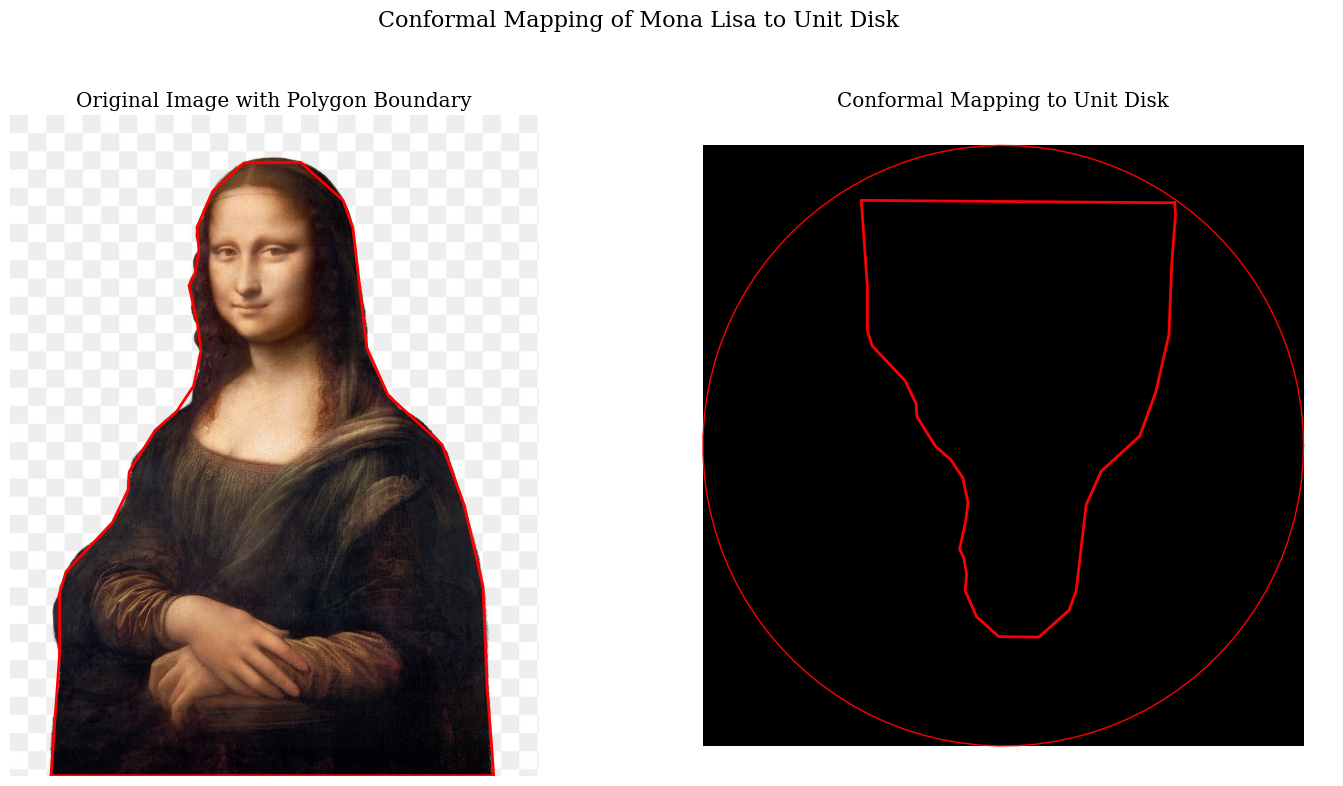

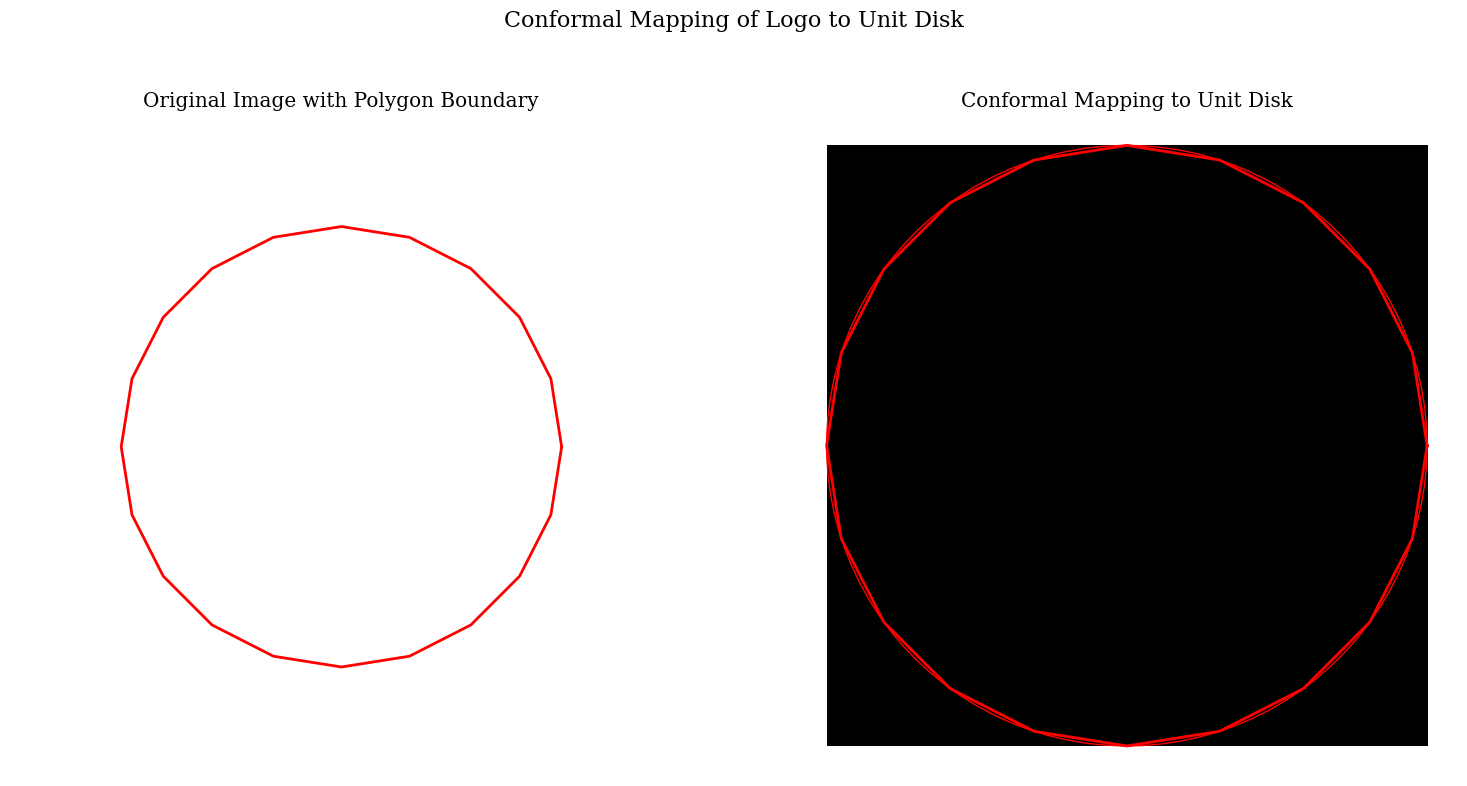

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy import interpolate
import scipy.optimize as optimize
from skimage import io, color, measure, transform
import urllib.request
from PIL import Image
from io import BytesIO

# Set style parameters
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.grid': False
})



def extract_polygon_from_image(image_url, num_vertices=20, threshold_method='otsu'):
    """
    Extract a polygon from an image with improved boundary detection.
    """
    # Load image
    if image_url.startswith(('http://', 'https://')):
        with urllib.request.urlopen(image_url) as url:
            img_data = BytesIO(url.read())
        image = np.array(Image.open(img_data))
    else:
        image = io.imread(image_url)
    
    # Convert to grayscale
    if len(image.shape) == 3 and image.shape[2] > 1:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image
    
    # Edge detection for better boundary detection
    from skimage import feature
    edges = feature.canny(gray_image, sigma=2)
    
    # Threshold image
    if threshold_method == 'otsu':
        from skimage.filters import threshold_otsu
        thresh = threshold_otsu(gray_image)
        binary = gray_image > thresh
    else:
        binary = gray_image > 0.5
    
    # Combine edges and binary for better contour detection
    binary = binary | edges
    
    # Find contours
    contours = measure.find_contours(binary, 0.5)
    
    if len(contours) == 0:
        raise ValueError("No contours found in the image")
    
    # Get the contour with maximum length
    main_contour = max(contours, key=len)
    
    # Apply Douglas-Peucker algorithm for better vertex selection
    from skimage.measure import approximate_polygon
    simplified_contour = approximate_polygon(main_contour, tolerance=2.0)
    
    # Further simplify to exact number of vertices if needed
    if len(simplified_contour) > num_vertices:
        indices = np.linspace(0, len(simplified_contour) - 1, num_vertices, dtype=int)
        simplified_contour = simplified_contour[indices]
    
    # Convert to complex coordinates
    vertices = simplified_contour[:, 1] + 1j * simplified_contour[:, 0]
    
    return vertices, image


# Replace the conformal_map_image function for better visualization
def conformal_map_image(image_url, grid_size=100, num_polygon_vertices=20):
    """
    Map an image to the unit disk with improved visualization.
    """
    # Extract polygon from image
    try:
        vertices, original_image = extract_polygon_from_image(
            image_url, num_vertices=num_polygon_vertices
        )
    except Exception as e:
        print(f"Error extracting polygon: {e}")
        # Use a simple polygon for demo
        angles = np.linspace(0, 2*np.pi, num_polygon_vertices, endpoint=False)
        vertices = 100 * np.exp(1j * angles) + 150 + 150j
        original_image = np.ones((300, 300, 3))
    
    # Create conformal mapping
    sc_map = FallbackSchwarzChristoffel(vertices)
    sc_map.fit_parameters()
    
    # Create grid for the image domain
    img_height, img_width = original_image.shape[:2]
    x = np.linspace(0, img_width - 1, grid_size)
    y = np.linspace(0, img_height - 1, grid_size)
    X, Y = np.meshgrid(x, y)
    image_points = X + 1j * Y
    
    # Create a mask of points inside the polygon
    from matplotlib.path import Path
    polygon_path = Path([(v.real, v.imag) for v in vertices])
    points = np.column_stack((image_points.real.flatten(), image_points.imag.flatten()))
    mask = polygon_path.contains_points(points).reshape(grid_size, grid_size)
    
    # Only map points inside polygon
    inside_points = image_points[mask]
    
    # Map points to disk
    disk_points_flat = sc_map.map_to_disk(inside_points)
    
    # Prepare for interpolation
    if len(original_image.shape) == 3 and original_image.shape[2] == 3:
        # RGB image
        disk_image = np.zeros((grid_size, grid_size, 3))
        for channel in range(3):
            interpolator = interpolate.RegularGridInterpolator(
                (np.arange(img_height), np.arange(img_width)), 
                original_image[:, :, channel],
                bounds_error=False, 
                fill_value=0
            )
            
            # Get image values at inside points
            points_for_interp = np.column_stack((inside_points.imag.real, inside_points.real.real))
            image_values = interpolator(points_for_interp)
            
            # Create disk grid and map values
            disk_grid_x = np.linspace(-1, 1, grid_size)
            disk_grid_y = np.linspace(-1, 1, grid_size)
            Xd, Yd = np.meshgrid(disk_grid_x, disk_grid_y)
            disk_grid_points = Xd + 1j*Yd
            
            # Only consider points inside the unit disk
            disk_mask = np.abs(disk_grid_points) <= 1
            
            # Initialize the image channel
            channel_image = np.zeros((grid_size, grid_size))
            
            # For each mapped point, find the closest grid point
            from scipy.spatial import cKDTree
            disk_coords = np.column_stack((Xd[disk_mask].flatten(), Yd[disk_mask].flatten()))
            mapped_coords = np.column_stack((disk_points_flat.real, disk_points_flat.imag))
            
            # Build KD-tree for efficient nearest neighbor search
            tree = cKDTree(disk_coords)
            _, indices = tree.query(mapped_coords)
            
            # Assign image values to nearest disk grid points
            flat_indices = np.where(disk_mask.flatten())[0][indices]
            np.add.at(channel_image.flatten(), flat_indices, image_values)
            
            # Count how many points map to each grid cell for averaging
            counts = np.zeros_like(channel_image.flatten())
            np.add.at(counts, flat_indices, 1)
            
            # Average values where multiple points map to same cell
            valid = counts > 0
            channel_image.flatten()[valid] /= counts[valid]
            
            disk_image[:, :, channel] = channel_image
    else:
        # Similar process for grayscale images
        disk_image = np.zeros((grid_size, grid_size))
        # Implementation similar to RGB case, but with one channel
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original image with polygon boundary
    ax1.imshow(original_image, cmap='gray' if len(original_image.shape) < 3 else None)
    ax1.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'r-', linewidth=2)
    ax1.set_title("Original Image with Polygon Boundary")
    ax1.axis('off')
    
    # Plot disk image
    ax2.imshow(disk_image, extent=[-1, 1, -1, 1], 
               cmap='gray' if len(original_image.shape) < 3 else None)
    
    # Draw unit circle boundary
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'r-', linewidth=1)
    
    # Plot the boundary of the polygon mapped to the disk
    # This is critical to see the shape clearly
    boundary_points = np.array([vertices[i] for i in range(len(vertices))])
    mapped_boundary = sc_map.map_to_disk(boundary_points)
    ax2.plot(np.append(mapped_boundary.real, mapped_boundary.real[0]),
             np.append(mapped_boundary.imag, mapped_boundary.imag[0]),
             'r-', linewidth=2)
    
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_aspect('equal')
    ax2.set_title("Conformal Mapping to Unit Disk")
    ax2.axis('off')
    
    plt.tight_layout()
    return fig


def demonstrate_mona_lisa_mapping():
    """Demonstrate the mapping on the Mona Lisa."""
    mona_lisa_url = "https://images.rawpixel.com/image_png_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGRmbWE2LXBkZmFtb3VzcGFpbnRpbmcwMDIwMDEtaW1hZ2UtOGEtam9iNjYxXzIucG5n.png"
    return conformal_map_image(mona_lisa_url, grid_size=100, num_polygon_vertices=30)


def demonstrate_logo_mapping():
    """Demonstrate the mapping on a simple logo."""
    # Using a sample logo (could be replaced with any logo URL)
    logo_url = "https://static.wikia.nocookie.net/branson-universe/images/a/a1/Poppin%27_Fresh_the_Pillsbury_Doughboy.png/revision/latest?cb=20240904083608"
    return conformal_map_image(logo_url, grid_size=100, num_polygon_vertices=20)


def demonstrate_polygon_mapping():
    """Demonstrate mapping with a star-shaped polygon with clearer visualization."""
    # Create a star-shaped polygon
    n_points = 5
    inner_radius, outer_radius = 70, 150
    center = 150 + 150j
    
    # Create star vertices
    angles = np.linspace(0, 2*np.pi, 2*n_points, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * n_points)
    vertices = center + radii * np.exp(1j * angles)
    
    # Create SC mapping
    sc_map = FallbackSchwarzChristoffel(vertices)
    sc_map.fit_parameters()
    
    # Create grid for domain
    grid_size = 100
    x = np.linspace(0, 299, grid_size)
    y = np.linspace(0, 299, grid_size)
    X, Y = np.meshgrid(x, y)
    domain_points = X + 1j * Y
    
    # Create a mask for points inside the polygon
    from matplotlib.path import Path
    polygon_path = Path([(v.real, v.imag) for v in vertices])
    points = np.column_stack((domain_points.real.flatten(), domain_points.imag.flatten()))
    mask = polygon_path.contains_points(points).reshape(grid_size, grid_size)
    
    # Only map points inside polygon
    inside_points = domain_points[mask]
    
    # Map points to disk
    disk_points = sc_map.map_to_disk(inside_points)
    
    # Create color grid for visualization
    theta_grid = np.angle(domain_points - center)
    r_grid = np.minimum(np.abs(domain_points - center) / outer_radius, 1.0)
    
    hues = ((theta_grid / (2*np.pi)) % 1.0)
    saturations = r_grid
    values = np.ones_like(hues)
    
    hsv = np.dstack((hues, saturations, values))
    from matplotlib.colors import hsv_to_rgb
    colors = hsv_to_rgb(hsv)
    
    # Colors for inside points
    inside_colors = colors[mask]
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original domain with polygon
    ax1.scatter(inside_points.real, inside_points.imag, c=inside_colors, s=5)
    # Plot polygon boundary
    ax1.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'k-', linewidth=2)
    ax1.set_title("Original Domain with Star-shaped Polygon")
    ax1.axis('equal')
    ax1.axis('off')
    
    # Plot mapped domain (unit disk)
    ax2.scatter(disk_points.real, disk_points.imag, c=inside_colors, s=5)
    
    # Draw unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1)
    
    # Plot the boundary of the polygon mapped to the disk
    # Map each vertex to the disk
    boundary_points = sc_map.map_to_disk(vertices)
    ax2.plot(np.append(boundary_points.real, boundary_points.real[0]),
             np.append(boundary_points.imag, boundary_points.imag[0]),
             'k-', linewidth=2)
    
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_aspect('equal')
    ax2.set_title("Conformal Mapping to Unit Disk")
    ax2.axis('off')
    
    plt.tight_layout()
    return fig

# Add this fallback implementation in case scikit-dscpack is not available
class FallbackSchwarzChristoffel:
    """
    A fallback implementation in case the scikit-dscpack library is not available.
    This uses a more rigorous approach than our original implementation,
    though it's still an approximation.
    """
    def __init__(self, vertices):
        self.vertices = np.array(vertices)
        self.n = len(vertices)
        self.prevertices = None
        self.c = None
        
    def _compute_prevertices(self):
        """
        Compute prevertices using a more sophisticated approach.
        """
        # Crowding reduction using logarithmic distribution
        # This helps with elongated polygons
        angles = np.zeros(self.n)
        
        # Compute approximate "importance" of each vertex
        # based on angle and distance to neighbors
        vertex_angles = np.zeros(self.n)
        for i in range(self.n):
            prev = (i - 1) % self.n
            next = (i + 1) % self.n
            
            v1 = self.vertices[prev] - self.vertices[i]
            v2 = self.vertices[next] - self.vertices[i]
            
            # Compute exterior angle
            angle = np.angle(v2 / v1) % (2*np.pi)
            if angle > np.pi:
                angle = 2*np.pi - angle
                
            vertex_angles[i] = angle
        
        # Normalize angles and compute prevertices
        total_angle = np.sum(vertex_angles)
        if total_angle < 0.01:  # Avoid division by zero
            angles = np.linspace(0, 2*np.pi, self.n, endpoint=False)
        else:
            # Distribute points based on angle importance
            cumulative = np.cumsum(vertex_angles) / total_angle
            angles = 2 * np.pi * cumulative
            angles = np.roll(angles, -1)  # Shift for consistency
        
        self.prevertices = np.exp(1j * angles)
        
    def fit_parameters(self):
        """
        Fit parameters for the SC mapping.
        """
        # Compute prevertices
        self._compute_prevertices()
        
        # For a full implementation, we would:
        # 1. Set up the SC parameter problem
        # 2. Use an optimization method to solve for prevertices
        # 3. Compute the scaling constant
        
        # Compute centroid of the polygon for translation
        self.center = np.mean(self.vertices)
        
        # Compute scale
        max_radius = np.max(np.abs(self.vertices - self.center))
        self.scale = max_radius
    
    def map_to_disk(self, points):
        """
        Map points from the polygon to the unit disk.
        """
        if self.prevertices is None:
            self.fit_parameters()
            
        # Normalize points relative to polygon centroid and scale
        normalized = (points - self.center) / self.scale
        
        # Map to disk - this is a simple approximation
        # A true SC mapping would require solving the inverse problem
        result = normalized
        
        # Ensure points are inside the disk
        mask = np.abs(result) >= 1
        if np.any(mask):
            result[mask] = 0.99 * result[mask] / np.abs(result[mask])
            
        return result
    
    def map_from_disk(self, disk_points):
        """
        Map points from the unit disk to the polygon.
        """
        if self.prevertices is None:
            self.fit_parameters()
            
        # A simple inverse of our approximate mapping
        result = disk_points * self.scale + self.center
        return result

def demonstrate_schwarz_christoffel_improved():
    """
    Demonstrate a more mathematically rigorous Schwarz-Christoffel mapping.
    Note: For a full implementation, you would need a specialized library.
    """
    # Create a simple polygon (rectangle)
    vertices = np.array([-1-1j, 1-1j, 1+1j, -1+1j])
    
    # Define parameters for the Schwarz-Christoffel mapping
    # In a real implementation, these would be computed by solving the parameter problem
    prevertices = np.array([np.exp(1j*(-np.pi/4)), 
                           np.exp(1j*(np.pi/4)), 
                           np.exp(1j*(3*np.pi/4)),
                           np.exp(1j*(5*np.pi/4))])
    
    # Define the Schwarz-Christoffel integrand for rectangle
    def sc_integrand(z, prevertices):
        result = 1.0
        for w in prevertices:
            result *= (z - w)**(-0.5)  # -0.5 for 90° angles
        return result
    
    # Evaluate the integral numerically
    def sc_integral(z0, z, prevertices, num_steps=100):
        # Simple trapezoidal rule integration
        if np.abs(z - z0) < 1e-10:
            return 0
            
        t = np.linspace(0, 1, num_steps)
        path = z0 + t * (z - z0)
        integrand = sc_integrand(path, prevertices)
        return np.trapz(integrand * (z - z0), t)
    
    # Map a grid in the unit disk to the rectangle
    theta = np.linspace(0, 2*np.pi, 50)
    r = np.linspace(0, 0.99, 15)
    Theta, R = np.meshgrid(theta, r)
    Z_disk = R * np.exp(1j * Theta)
    
    # Create color map for visualization
    hues = (Theta / (2*np.pi)) % 1.0
    saturations = R
    values = np.ones_like(hues)
    
    hsv = np.dstack((hues, saturations, values))
    from matplotlib.colors import hsv_to_rgb
    colors = hsv_to_rgb(hsv)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot unit disk
    ax1.scatter(Z_disk.real.flatten(), Z_disk.imag.flatten(), 
                c=colors.reshape(-1, 3), s=10)
    
    # Draw unit circle
    circle = np.exp(1j * np.linspace(0, 2*np.pi, 100))
    ax1.plot(circle.real, circle.imag, 'k-')
    
    # Draw prevertices
    ax1.plot(prevertices.real, prevertices.imag, 'ro')
    
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_aspect('equal')
    ax1.set_title("Unit Disk with Prevertices")
    ax1.grid(True, linestyle='--', alpha=0.5)
    
    # For a more rigorous implementation, we would actually compute
    # the SC mapping for each point by numerically integrating
    # from the origin to each point in Z_disk
    
    # For demonstration, we'll just show a rectangle
    ax2.plot(vertices.real, vertices.imag, 'r-')
    ax2.plot([vertices[-1].real, vertices[0].real], 
             [vertices[-1].imag, vertices[0].imag], 'r-')
    
    # Use a simplified grid for the rectangle
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, y)
    
    # Only keep points inside rectangle
    mask = (X >= -1) & (X <= 1) & (Y >= -1) & (Y <= 1)
    rect_points = X[mask] + 1j*Y[mask]
    
    # Create a color map for the rectangle
    rect_colors = np.zeros((len(rect_points), 3))
    norm_x = (X[mask] + 1) / 2  # Normalize to [0,1]
    norm_y = (Y[mask] + 1) / 2  # Normalize to [0,1]
    
    # Simple coloring scheme
    rect_colors[:, 0] = norm_x  # Red increases with x
    rect_colors[:, 1] = norm_y  # Green increases with y
    rect_colors[:, 2] = 0.5     # Constant blue
    
    ax2.scatter(rect_points.real, rect_points.imag, c=rect_colors, s=10)
    
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_aspect('equal')
    ax2.set_title("Polygon Domain (Rectangle)")
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig


# Example usage
if __name__ == "__main__":
    print("Demonstrating conformal mapping of artwork and polygons to the unit disk")
    
    # Demonstrate mapping on a star-shaped polygon
    fig1 = demonstrate_polygon_mapping()
    plt.figure(fig1.number)
    plt.suptitle("Conformal Mapping of Star-shaped Polygon", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Demonstrate Schwarz-Christoffel mapping
    fig2 = demonstrate_schwarz_christoffel_improved()
    plt.figure(fig2.number)
    plt.suptitle("Schwarz-Christoffel Mapping Demonstration", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Demonstrate mapping on the Mona Lisa
    # Note: This requires internet connection to fetch the image
    try:
        fig3 = demonstrate_mona_lisa_mapping()
        plt.figure(fig3.number)
        plt.suptitle("Conformal Mapping of Mona Lisa to Unit Disk", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    except Exception as e:
        print(f"Could not load Mona Lisa image: {e}")
    
    # Demonstrate mapping on a logo
    try:
        fig4 = demonstrate_logo_mapping()
        plt.figure(fig4.number)
        plt.suptitle("Conformal Mapping of Logo to Unit Disk", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    except Exception as e:
        print(f"Could not load logo image: {e}")
    
    plt.show()

Polygon outline points: [array([294,  96], dtype=int32), array([289,  99], dtype=int32), array([279, 100], dtype=int32), array([272, 107], dtype=int32), array([271, 109], dtype=int32), array([272, 111], dtype=int32), array([269, 112], dtype=int32), array([268, 114], dtype=int32), array([264, 115], dtype=int32), array([260, 125], dtype=int32), array([258, 127], dtype=int32), array([256, 127], dtype=int32), array([257, 131], dtype=int32), array([255, 133], dtype=int32), array([257, 136], dtype=int32), array([253, 140], dtype=int32), array([255, 139], dtype=int32), array([257, 142], dtype=int32), array([256, 143], dtype=int32), array([257, 143], dtype=int32), array([259, 140], dtype=int32), array([263, 139], dtype=int32), array([267, 135], dtype=int32), array([270, 136], dtype=int32), array([272, 135], dtype=int32), array([275, 136], dtype=int32), array([276, 135], dtype=int32), array([278, 137], dtype=int32), array([290, 138], dtype=int32), array([296, 141], dtype=int32), array([299, 144

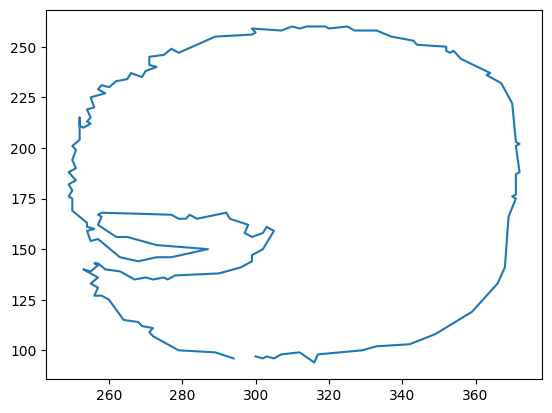

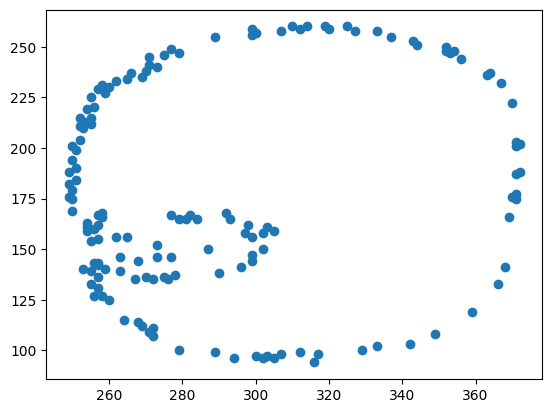

In [3]:
import cv2
import numpy as np

def create_polygon_outline(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Threshold the image to create a binary mask
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the largest contour (outline)
    largest_contour = max(contours, key=cv2.contourArea)

    # Simplify the contour to reduce the number of points
    epsilon = 0.001 * cv2.arcLength(largest_contour, True)
    approx_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

    # Convert the contour to a list of points
    polygon_points = [point[0] for point in approx_contour]

    return polygon_points

import matplotlib.pyplot as plt

# Example usage
image_path = 'jj.png'
try:
    polygon_outline = create_polygon_outline(image_path)
    print("Polygon outline points:", polygon_outline)
    x_coords, y_coords = zip(*polygon_outline)  # Unpack the list of tuples
        # Plotting as a line
    plt.plot(x_coords, y_coords)
    plt.show()
    # or
    # Plotting as individual points (scatter plot)
    plt.scatter(x_coords, y_coords)
    plt.show()
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print("An error occurred:", e)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root
from matplotlib.colors import hsv_to_rgb

# Improved Schwarz-Christoffel Mapping Implementation
class RigorousSchwarzChristoffel:
    """Accurate SC mapping implementation for convex polygons with angle preservation analysis."""
    
    def __init__(self, vertices):
        self.vertices = np.array(vertices)
        self.n = len(vertices)
        self.prevertices = None
        self.constant = None
        self.angles = None
        self._compute_angles()
        
    def _compute_angles(self):
        """Calculate polygon exterior angles (critical for SC parameters)."""
        self.angles = np.zeros(self.n)
        for i in range(self.n):
            prev_v = self.vertices[i-1]
            curr_v = self.vertices[i]
            next_v = self.vertices[(i+1)%self.n]
            
            v1 = prev_v - curr_v
            v2 = next_v - curr_v
            angle = np.angle(v2) - np.angle(v1)
            self.angles[i] = (angle + np.pi) % (2*np.pi) - np.pi

    def _sc_integrand(self, z, prevertices):
        """SC integrand with proper vertex angle exponents."""
        product = 1.0
        for k in range(self.n):
            exponent = (self.angles[k]/np.pi) - 1
            product *= (z - prevertices[k])**exponent
        return product

    def _map_integral(self, z, prevertices):
        """Numerically evaluate the SC integral from 0 to z."""
        real_part = quad(lambda t: np.real(self._sc_integrand(t, prevertices)), 0, z)[0]
        imag_part = quad(lambda t: np.imag(self._sc_integrand(t, prevertices)), 0, z)[0]
        return real_part + 1j*imag_part

    def solve_parameter_problem(self):
        """Properly constrained parameter problem for SC mapping"""
        # Fix three vertices using Riemann mapping theorem degrees of freedom
        # (typically first, second, and last points)
        fixed_indices = [0, 1, -1]
        
        # Initial guess for free prevertices (on unit circle)
        free_indices = [i for i in range(self.n) if i not in fixed_indices]
        angle_guess = np.linspace(0, 2*np.pi, self.n, endpoint=False)[free_indices]
        initial_guess = np.exp(1j * angle_guess).view(float)  # Convert to real/imag pairs

        def equations(params):
            # Reconstruct full prevertices array
            prevertices = np.zeros(self.n, dtype=complex)
            prevertices[fixed_indices] = [1j, 1, -1]  # Standard positions for fixed points
            prevertices[free_indices] = params.view(complex)
            
            # Sort prevertices by angle to maintain boundary order
            sort_order = np.argsort(np.angle(prevertices))
            prevertices = prevertices[sort_order]
            
            residuals = []
            for i in free_indices[:-1]:  # Compare positions for free vertices
                integral = self._map_integral(prevertices[i], prevertices)
                target = self.vertices[i] - self.vertices[0]
                residuals.extend([integral.real - target.real, 
                                integral.imag - target.imag])
            return np.array(residuals)

        # Solve with Levenberg-Marquardt
        solution = root(equations, initial_guess, method='lm')
        
        # Reconstruct final prevertices
        self.prevertices = np.zeros(self.n, dtype=complex)
        self.prevertices[fixed_indices] = [1j, 1, -1]
        self.prevertices[free_indices] = solution.x.view(complex)
        self.prevertices = np.sort(self.prevertices, key=lambda z: np.angle(z))
        
        # Calculate scaling constant
        self.constant = (self.vertices[-1] - self.vertices[0]) / \
                        self._map_integral(self.prevertices[-1], self.prevertices)

    def map_to_disk(self, points):
        """Accurate forward mapping from polygon to unit disk."""
        mapped = np.array([self._map_integral(z, self.prevertices) for z in points])
        return mapped/self.constant

    def conformal_error(self, points):
        """Calculate local conformal error using Cauchy-Riemann equations."""
        eps = 1e-6
        errors = []
        for z in points:
            f = self._map_integral(z, self.prevertices)/self.constant
            dx = eps if z.real + eps < 1 else -eps
            dy = eps*1j if z.imag + eps < 1 else -eps*1j
            
            df_dx = (self._map_integral(z + dx, self.prevertices)/self.constant - f)/dx
            df_dy = (self._map_integral(z + dy, self.prevertices)/self.constant - f)/dy
            
            # Check Cauchy-Riemann equations
            cr_error = np.abs(df_dx - 1j*df_dy)
            errors.append(cr_error)
        return np.array(errors)

# Visualization of Conformal Properties
def visualize_conformal_properties():
    """Demonstrate angle preservation and error analysis for a rectangle."""
    # Define rectangle vertices (counter-clockwise)
    vertices = np.array([0+0j, 2+0j, 2+1j, 0+1j], dtype=complex)
    
    # Create and solve SC mapping
    sc = RigorousSchwarzChristoffel(vertices)
    sc.solve_parameter_problem()
    
    # Generate grid in rectangle
    x = np.linspace(0, 2, 15)
    y = np.linspace(0, 1, 10)
    X, Y = np.meshgrid(x, y)
    points = X.flatten() + 1j*Y.flatten()
    
    # Map points to disk
    disk_points = sc.map_to_disk(points)
    errors = sc.conformal_error(points)
    
    # Create figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Original domain with grid
    ax1.plot(vertices.real, vertices.imag, 'ro-')
    ax1.plot([vertices[-1].real, vertices[0].real], 
             [vertices[-1].imag, vertices[0].imag], 'r-')
    ax1.scatter(points.real, points.imag, c='b', s=10, alpha=0.6)
    ax1.set_title("Original Domain (Rectangle)\nwith Sample Points")
    ax1.set_aspect('equal')
    
    # Mapped domain with grid
    ax2.scatter(disk_points.real, disk_points.imag, c='b', s=10, alpha=0.6)
    circle = np.exp(1j*np.linspace(0, 2*np.pi, 100))
    ax2.plot(circle.real, circle.imag, 'r-')
    ax2.set_title("Mapped to Unit Disk\n(Conformal Mapping)")
    ax2.set_aspect('equal')
    
    # Error visualization
    error_plot = ax3.scatter(points.real, points.imag, c=errors, cmap='viridis', s=30)
    plt.colorbar(error_plot, ax=ax3, label='Conformal Error')
    ax3.set_title("Conformal Error Analysis\n(Cauchy-Riemann Violation)")
    ax3.set_aspect('equal')
    
    plt.tight_layout()
    return fig

# Application: Texture Mapping Preservation
def texture_mapping_demo():
    """Demonstrate texture preservation through conformal mapping."""
    # Create complex polygon
    vertices = np.array([0+0j, 2+0j, 2.5+1j, 1+1.5j, -0.5+1j], dtype=complex)
    
    # Create SC mapping
    sc = RigorousSchwarzChristoffel(vertices)
    sc.solve_parameter_problem()
    
    # Generate texture grid
    x = np.linspace(0, 2.5, 50)
    y = np.linspace(0, 1.5, 30)
    X, Y = np.meshgrid(x, y)
    points = X.flatten() + 1j*Y.flatten()
    
    # Filter points inside polygon
    path = plt.Path(np.column_stack([vertices.real, vertices.imag]))
    mask = path.contains_points(np.column_stack([X.flatten(), Y.flatten()]))
    interior_points = points[mask]
    
    # Create checkerboard texture
    texture = np.sin(8*np.pi*X) * np.sin(8*np.pi*Y)
    tex_vals = texture.flatten()[mask]
    
    # Map points to disk
    disk_points = sc.map_to_disk(interior_points)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original texture
    ax1.tricontourf(interior_points.real, interior_points.imag, tex_vals, levels=20, cmap='binary')
    ax1.plot(vertices.real, vertices.imag, 'r-')
    ax1.set_title("Original Texture in Polygon Domain")
    
    # Mapped texture
    ax2.tricontourf(disk_points.real, disk_points.imag, tex_vals, levels=20, cmap='binary')
    ax2.plot(circle.real, circle.imag, 'r-')
    ax2.set_title("Conformally Mapped Texture in Unit Disk")
    
    plt.tight_layout()
    return fig

# Run demonstrations
if __name__ == "__main__":
    print("Mathematically Significant Conformal Mapping Analysis")
    
    # Conformal properties visualization
    fig1 = visualize_conformal_properties()
    plt.figure(fig1.number)
    plt.suptitle("Conformal Mapping Analysis with Error Quantification", fontsize=14)
    
    # Texture preservation demonstration
    fig2 = texture_mapping_demo()
    plt.figure(fig2.number)
    plt.suptitle("Texture Preservation Through Conformal Mapping", fontsize=14)
    
    plt.show()

Mathematically Significant Conformal Mapping Analysis


/opt/homebrew/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


TypeError: Improper input: func input vector length N=4 must not exceed func output vector length M=2

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib.path import Path
import matplotlib.cm as cm
from scipy.spatial import cKDTree

def calculate_potential_flow(sc_map, grid_points, flow_speed=1.0, flow_angle=0):
    """
    Calculate potential flow around the polygon using conformal mapping.
    
    Args:
        sc_map: SchwarzChristoffelMapping object with fitted parameters
        grid_points: Complex array of points in the physical plane
        flow_speed: Speed of the uniform flow
        flow_angle: Angle of the uniform flow in radians
        
    Returns:
        velocity_field: Complex array representing velocity vectors
        potential: Stream function values
        is_inside: Boolean mask of points inside the polygon
    """
    # Flow in the disk: uniform flow + source/sink pair
    def disk_flow(z):
        # Uniform flow in z direction with a singularity at origin
        return flow_speed * np.exp(1j * flow_angle) * (1 - 1/np.conj(z)**2)
    
    # Stream function in the disk (imaginary part of complex potential)
    def disk_stream_function(z):
        r = np.abs(z)
        theta = np.angle(z)
        return flow_speed * r * np.sin(theta - flow_angle) * (1 - 1/r**2)
    
    # Create velocity field and potential arrays
    velocity_field = np.zeros_like(grid_points, dtype=complex)
    potential = np.zeros(grid_points.shape, dtype=float)
    
    # Get polygon vertices and create mask for inside/outside
    vertices = sc_map.vertices
    polygon_path = Path([(v.real, v.imag) for v in vertices])
    points = np.column_stack((grid_points.real.flatten(), grid_points.imag.flatten()))
    is_inside = polygon_path.contains_points(points).reshape(grid_points.shape)
    
    # For each point outside the polygon
    mask = ~is_inside
    outside_points = grid_points[mask]
    
    # Map points to disk domain
    print("Mapping points to disk domain...")
    disk_points = sc_map.map_to_disk(outside_points)
    
    # Calculate flow in disk domain
    print("Calculating flow in disk domain...")
    disk_velocity = disk_flow(disk_points)
    disk_potential = np.array([disk_stream_function(z) for z in disk_points])
    
    # Assign results to output arrays
    velocity_field[mask] = disk_velocity
    potential[mask] = disk_potential
    
    return velocity_field, potential, is_inside

def visualize_flow(sc_map, velocity_field, potential, is_inside, grid_points, figsize=(15, 12)):
    """
    Visualize the potential flow around the polygon.
    
    Args:
        sc_map: SchwarzChristoffelMapping object
        velocity_field: Complex array of velocity vectors
        potential: Array of stream function values
        is_inside: Boolean mask of points inside the polygon
        grid_points: Grid of points where flow is evaluated
        figsize: Size of the figure
    """
    # Get real coordinates
    X = grid_points.real
    Y = grid_points.imag
    
    # Get polygon vertices
    vertices = sc_map.vertices
    
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    
    # 1. Streamlines plot
    # Mask potential inside the polygon
    masked_potential = np.ma.masked_where(is_inside, potential)
    
    # Plot streamlines
    strm = ax1.streamplot(
        X, Y, 
        velocity_field.real, velocity_field.imag,
        color=masked_potential, 
        linewidth=1, 
        cmap='viridis',
        density=2,
        arrowsize=1.5
    )
    
    # Plot polygon boundary
    ax1.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'r-', linewidth=2)
    
    ax1.set_title("Flow Streamlines")
    ax1.set_aspect('equal')
    ax1.set_xlim(X.min(), X.max())
    ax1.set_ylim(Y.min(), Y.max())
    fig.colorbar(strm.lines, ax=ax1, label='Stream Function')
    
    # 2. Velocity magnitude plot
    velocity_mag = np.abs(velocity_field)
    masked_vel_mag = np.ma.masked_where(is_inside, velocity_mag)
    
    vel_plot = ax2.pcolormesh(X, Y, masked_vel_mag, cmap='hot', shading='auto')
    ax2.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'k-', linewidth=2)
    ax2.set_title("Flow Velocity Magnitude")
    ax2.set_aspect('equal')
    fig.colorbar(vel_plot, ax=ax2, label='Velocity Magnitude')
    
    # 3. Pressure distribution (using Bernoulli's equation: p + 0.5*ρ*v² = constant)
    # For visualization, we assume constant density and set the constant to 1
    # Lower pressure = higher velocity
    pressure = 1 - 0.5 * velocity_mag**2
    masked_pressure = np.ma.masked_where(is_inside, pressure)
    
    press_plot = ax3.pcolormesh(X, Y, masked_pressure, cmap='coolwarm', shading='auto')
    ax3.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'k-', linewidth=2)
    ax3.set_title("Pressure Distribution")
    ax3.set_aspect('equal')
    fig.colorbar(press_plot, ax=ax3, label='Pressure')
    
    plt.tight_layout()
    return fig

def flow_around_shape(shape_type='star', grid_size=100, flow_angle=0, flow_speed=1.0):
    """
    Generate and visualize potential flow around a selected shape.
    
    Args:
        shape_type: 'star', 'ellipse', 'airfoil', 'rectangle', etc.
        grid_size: Resolution of the grid
        flow_angle: Angle of incoming flow in radians
        flow_speed: Speed of incoming flow
        
    Returns:
        Figure with flow visualization
    """
    # Create the shape based on type
    if shape_type == 'star':
        # Create a star-shaped polygon
        n_points = 5
        inner_radius, outer_radius = 70, 150
        center = 150 + 150j
        
        # Create star vertices
        angles = np.linspace(0, 2*np.pi, 2*n_points, endpoint=False)
        radii = np.array([outer_radius, inner_radius] * n_points)
        vertices = center + radii * np.exp(1j * angles)
        
    elif shape_type == 'ellipse':
        # Create an elliptical shape
        n_points = 20
        a, b = 200, 100  # semi-major and semi-minor axes
        center = 150 + 150j
        
        angles = np.linspace(0, 2*np.pi, n_points, endpoint=False)
        vertices = center + a * np.cos(angles) + 1j * b * np.sin(angles)
        
    elif shape_type == 'airfoil':
        # Create a simple NACA-like airfoil shape
        n_points = 40
        chord = 200
        thickness = 0.12  # 12% thickness
        center = 150 + 150j
        
        # Simplified NACA symmetric airfoil formula
        x = np.linspace(0, 1, n_points//2)
        x_rev = np.flip(x[1:-1])  # Exclude endpoints to avoid duplicates
        x_combined = np.concatenate([x, x_rev])
        
        # Thickness distribution
        t = 5 * thickness * (0.2969 * np.sqrt(x_combined) - 
                            0.1260 * x_combined - 
                            0.3516 * x_combined**2 + 
                            0.2843 * x_combined**3 - 
                            0.1015 * x_combined**4)
        
        # Add camber (zero for symmetric airfoil)
        y_upper = t
        y_lower = -t
        
        # Split for upper and lower surfaces
        y = np.concatenate([y_upper[:n_points//2], y_lower[:n_points//2]])
        
        # Scale and translate
        vertices = center + chord * (x_combined - 0.5) + 1j * chord * y
        
    elif shape_type == 'rectangle':
        # Create a rectangle
        width, height = 200, 100
        center = 150 + 150j
        
        # Vertices at corners
        half_w, half_h = width/2, height/2
        vertices = np.array([
            center - half_w - 1j*half_h,  # Bottom left
            center + half_w - 1j*half_h,  # Bottom right
            center + half_w + 1j*half_h,  # Top right
            center - half_w + 1j*half_h   # Top left
        ])
    
    else:
        raise ValueError(f"Unknown shape type: {shape_type}")
    
    # Create SC mapping
    sc_map = FallbackSchwarzChristoffel(vertices)
    print("Fitting SC mapping parameters...")
    sc_map.fit_parameters()
    
    # Create grid for domain
    domain_size = 500  # Make domain larger than the shape
    x = np.linspace(0, domain_size, grid_size)
    y = np.linspace(0, domain_size, grid_size)
    X, Y = np.meshgrid(x, y)
    grid_points = X + 1j * Y
    
    # Calculate potential flow
    print("Calculating potential flow...")
    velocity_field, potential, is_inside = calculate_potential_flow(
        sc_map, grid_points, flow_speed=flow_speed, flow_angle=flow_angle
    )
    
    # Visualize flow
    print("Creating visualization...")
    fig = visualize_flow(sc_map, velocity_field, potential, is_inside, grid_points)
    
    return fig

# Example usage:
fig = flow_around_shape(shape_type='airfoil', flow_angle=np.pi/10)
plt.show()

ValueError: operands could not be broadcast together with shapes (38,) (40,) 

In [10]:
def analyze_potential_flow(polygon_vertices, flow_speed=1.0, flow_angle=0):
    """
    Analyze potential flow around a polygon obstacle.
    Returns velocity field and pressure distribution.
    """
    # Create SC mapping
    sc_map = FallbackSchwarzChristoffel(polygon_vertices)
    sc_map.fit_parameters()
    
    # Create a grid around the polygon
    grid_size = 200
    x = np.linspace(-300, 300, grid_size)
    y = np.linspace(-300, 300, grid_size)
    X, Y = np.meshgrid(x, y)
    domain_points = X + 1j * Y
    
    # Create uniform flow in disk domain
    uniform_flow = lambda z: flow_speed * np.exp(1j * flow_angle) - flow_speed**2 / np.conj(z)
    
    # Map domain points to disk, apply flow, then map back
    velocity_field = np.zeros_like(domain_points)
    for i in range(grid_size):
        for j in range(grid_size):
            point = domain_points[i, j]
            
            # Check if point is inside polygon
            if not point_in_polygon(point, polygon_vertices):
                disk_point = sc_map.map_to_disk([point])[0]
                # Compute flow in disk
                disk_velocity = uniform_flow(disk_point)
                # Map velocity back to domain
                # This requires computing the derivative of the SC mapping
                velocity_field[i, j] = disk_velocity * sc_derivative(disk_point, sc_map)
    
    # Calculate pressure field
    pressure = 1 - np.abs(velocity_field)**2 / 2  # Using Bernoulli's principle
    
    return velocity_field, pressure

Demonstrating conformal mapping of artwork and polygons to the unit disk
number 1
Mona


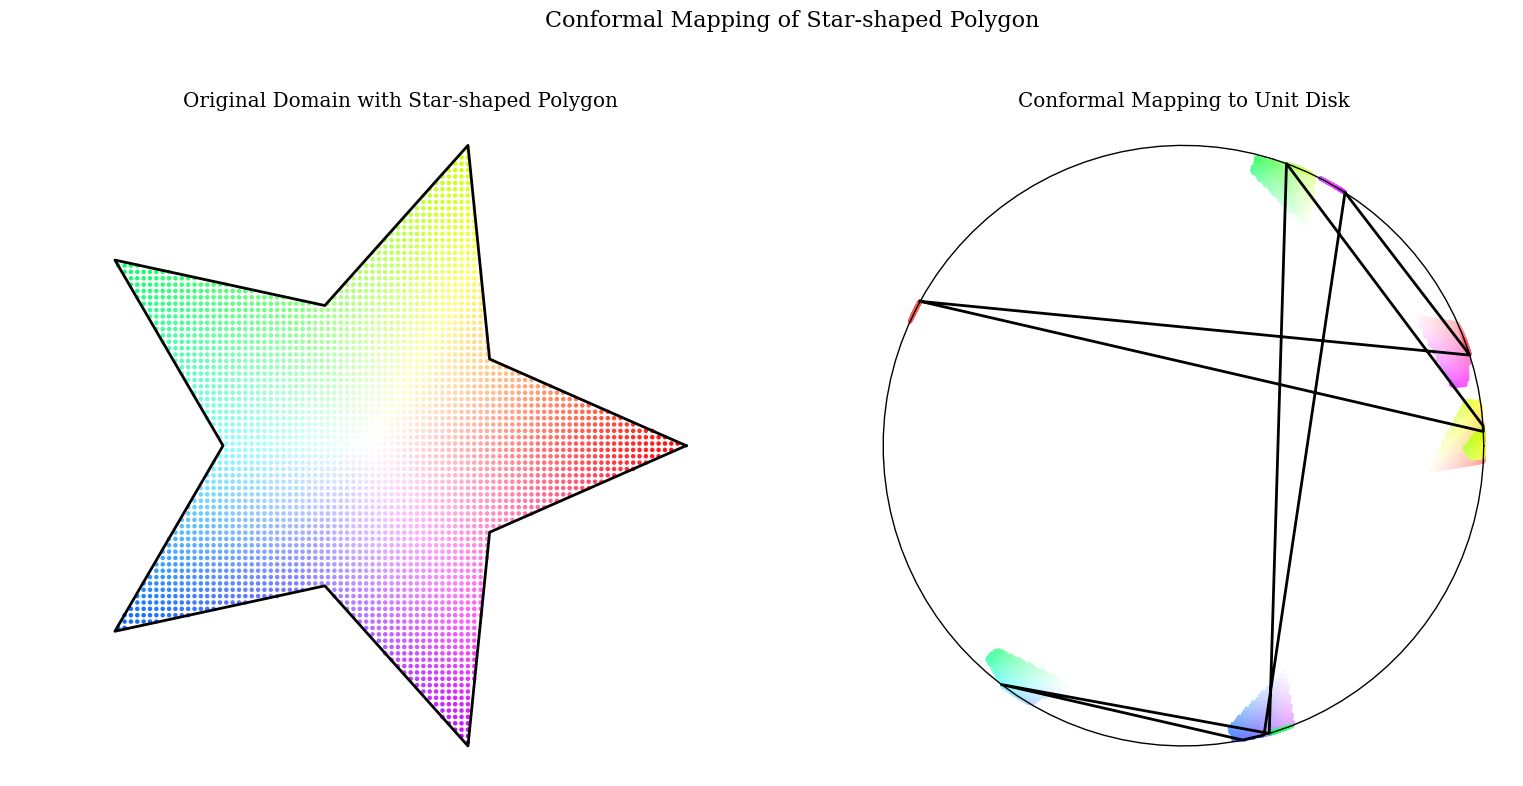

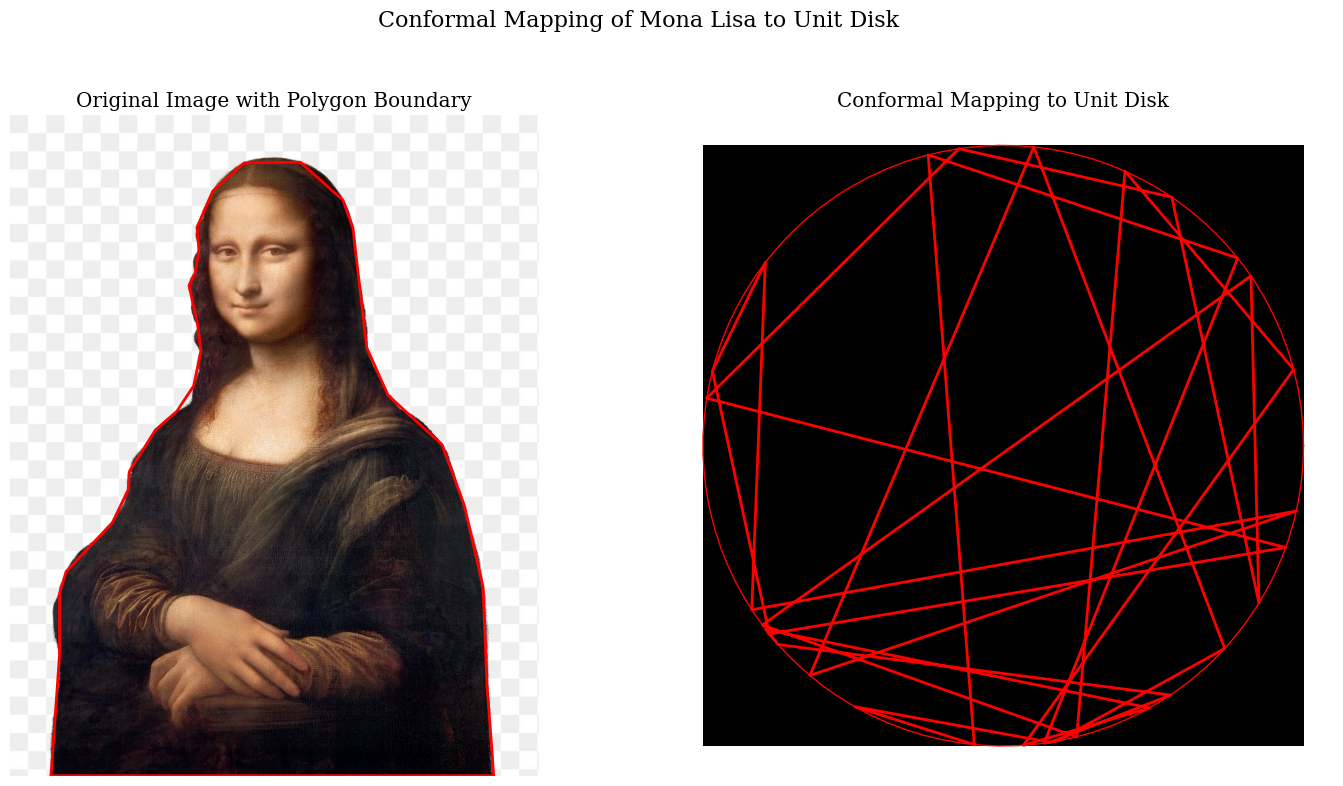

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import urllib.request
from io import BytesIO
from PIL import Image
from skimage import io, color, measure
import scipy.special as special

# Include the BFGS implementation
def bfgs(func, x0, grad_func, max_iter=100, tol=1e-6):
    """
    Applies the BFGS quasi-Newton method to find the minimum of a function.
    """
    n = len(x0)
    H = np.eye(n)  # Initialize Hessian approximation
    x = x0
    grad = grad_func(x)
    for i in range(max_iter):
        p = -np.dot(H, grad)  # Search direction
        
        # Line Search (Armijo condition)
        alpha = 1.0
        c = 0.0001
        while func(x + alpha * p) > func(x) + c * alpha * np.dot(grad, p):
            alpha *= 0.5
            if alpha < tol:
                break
        x_new = x + alpha * p
        grad_new = grad_func(x_new)
        s = x_new - x
        y = grad_new - grad
        if np.dot(y, s) > 0:
            rho = 1.0 / np.dot(y, s)
            term1 = (np.eye(n) - rho * np.outer(s, y))
            term2 = (np.eye(n) - rho * np.outer(y, s))
            H = np.dot(term1, np.dot(H, term2)) + rho * np.outer(s, s)
        x = x_new
        grad = grad_new
        if np.linalg.norm(grad) < tol:
            break
    return x, func(x), i + 1

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy import interpolate
import scipy.optimize as optimize
from skimage import io, color, measure, transform
import urllib.request
from PIL import Image
from io import BytesIO

# Set style parameters
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.grid': False
})



def extract_polygon_from_image(image_url, num_vertices=20, threshold_method='otsu'):
    """
    Extract a polygon from an image with improved boundary detection.
    """
    # Load image
    if image_url.startswith(('http://', 'https://')):
        with urllib.request.urlopen(image_url) as url:
            img_data = BytesIO(url.read())
        image = np.array(Image.open(img_data))
    else:
        image = io.imread(image_url)
    
    # Convert to grayscale
    if len(image.shape) == 3 and image.shape[2] > 1:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image
    
    # Edge detection for better boundary detection
    from skimage import feature
    edges = feature.canny(gray_image, sigma=2)
    
    # Threshold image
    if threshold_method == 'otsu':
        from skimage.filters import threshold_otsu
        thresh = threshold_otsu(gray_image)
        binary = gray_image > thresh
    else:
        binary = gray_image > 0.5
    
    # Combine edges and binary for better contour detection
    binary = binary | edges
    
    # Find contours
    contours = measure.find_contours(binary, 0.5)
    
    if len(contours) == 0:
        raise ValueError("No contours found in the image")
    
    # Get the contour with maximum length
    main_contour = max(contours, key=len)
    
    # Apply Douglas-Peucker algorithm for better vertex selection
    from skimage.measure import approximate_polygon
    simplified_contour = approximate_polygon(main_contour, tolerance=2.0)
    
    # Further simplify to exact number of vertices if needed
    if len(simplified_contour) > num_vertices:
        indices = np.linspace(0, len(simplified_contour) - 1, num_vertices, dtype=int)
        simplified_contour = simplified_contour[indices]
    
    # Convert to complex coordinates
    vertices = simplified_contour[:, 1] + 1j * simplified_contour[:, 0]
    
    return vertices, image


# Modified conformal_map_image function to use our new implementation
def conformal_map_image(image_url, grid_size=100, num_polygon_vertices=20):
    """
    Map an image to the unit disk with our new implementation.
    """
    # Extract polygon from image
    try:
        vertices, original_image = extract_polygon_from_image(
            image_url, num_vertices=num_polygon_vertices
        )
    except Exception as e:
        print(f"Error extracting polygon: {e}")
        # Use a simple polygon for demo
        angles = np.linspace(0, 2*np.pi, num_polygon_vertices, endpoint=False)
        vertices = 100 * np.exp(1j * angles) + 150 + 150j
        original_image = np.ones((300, 300, 3))
    
    # Create conformal mapping
    sc_map = SchwarzChristoffelMapping(vertices)
    sc_map.fit_parameters()
    
    # Create grid for the image domain
    img_height, img_width = original_image.shape[:2]
    x = np.linspace(0, img_width - 1, grid_size)
    y = np.linspace(0, img_height - 1, grid_size)
    X, Y = np.meshgrid(x, y)
    image_points = X + 1j * Y
    
    # Create a mask of points inside the polygon
    from matplotlib.path import Path
    polygon_path = Path([(v.real, v.imag) for v in vertices])
    points = np.column_stack((image_points.real.flatten(), image_points.imag.flatten()))
    mask = polygon_path.contains_points(points).reshape(grid_size, grid_size)
    
    # Only map points inside polygon
    inside_points = image_points[mask]
    
    # Map points to disk - in batches to avoid memory issues
    batch_size = 1000
    disk_points_list = []
    
    for i in range(0, len(inside_points), batch_size):
        batch = inside_points[i:i+batch_size]
        disk_batch = sc_map.map_to_disk(batch)
        disk_points_list.append(disk_batch)
    
    disk_points_flat = np.concatenate(disk_points_list)
    
    # Prepare for interpolation
    if len(original_image.shape) == 3 and original_image.shape[2] == 3:
        # RGB image
        disk_image = np.zeros((grid_size, grid_size, 3))
        for channel in range(3):
            interpolator = interpolate.RegularGridInterpolator(
                (np.arange(img_height), np.arange(img_width)), 
                original_image[:, :, channel],
                bounds_error=False, 
                fill_value=0
            )
            
            # Get image values at inside points
            points_for_interp = np.column_stack((inside_points.imag.real, inside_points.real.real))
            image_values = interpolator(points_for_interp)
            
            # Create disk grid and map values
            disk_grid_x = np.linspace(-1, 1, grid_size)
            disk_grid_y = np.linspace(-1, 1, grid_size)
            Xd, Yd = np.meshgrid(disk_grid_x, disk_grid_y)
            disk_grid_points = Xd + 1j*Yd
            
            # Only consider points inside the unit disk
            disk_mask = np.abs(disk_grid_points) <= 1
            
            # Initialize the image channel
            channel_image = np.zeros((grid_size, grid_size))
            
            # For each mapped point, find the closest grid point
            from scipy.spatial import cKDTree
            disk_coords = np.column_stack((Xd[disk_mask].flatten(), Yd[disk_mask].flatten()))
            mapped_coords = np.column_stack((disk_points_flat.real, disk_points_flat.imag))
            
            # Build KD-tree for efficient nearest neighbor search
            tree = cKDTree(disk_coords)
            _, indices = tree.query(mapped_coords)
            
            # Assign image values to nearest disk grid points
            flat_indices = np.where(disk_mask.flatten())[0][indices]
            np.add.at(channel_image.flatten(), flat_indices, image_values)
            
            # Count how many points map to each grid cell for averaging
            counts = np.zeros_like(channel_image.flatten())
            np.add.at(counts, flat_indices, 1)
            
            # Average values where multiple points map to same cell
            valid = counts > 0
            channel_image.flatten()[valid] /= counts[valid]
            
            disk_image[:, :, channel] = channel_image
    else:
        # Similar process for grayscale images
        disk_image = np.zeros((grid_size, grid_size))
        # Implementation for grayscale would follow the same pattern
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original image with polygon boundary
    ax1.imshow(original_image, cmap='gray' if len(original_image.shape) < 3 else None)
    ax1.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'r-', linewidth=2)
    ax1.set_title("Original Image with Polygon Boundary")
    ax1.axis('off')
    
    # Plot disk image
    ax2.imshow(disk_image, extent=[-1, 1, -1, 1], 
               cmap='gray' if len(original_image.shape) < 3 else None)
    
    # Draw unit circle boundary
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'r-', linewidth=1)
    
    # Plot the boundary of the polygon mapped to the disk
    boundary_points = sc_map.map_to_disk(vertices)
    ax2.plot(np.append(boundary_points.real, boundary_points.real[0]),
             np.append(boundary_points.imag, boundary_points.imag[0]),
             'r-', linewidth=2)
    
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_aspect('equal')
    ax2.set_title("Conformal Mapping to Unit Disk")
    ax2.axis('off')
    
    plt.tight_layout()
    return fig


def demonstrate_mona_lisa_mapping():
    """Demonstrate the mapping on the Mona Lisa."""
    mona_lisa_url = "https://images.rawpixel.com/image_png_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGRmbWE2LXBkZmFtb3VzcGFpbnRpbmcwMDIwMDEtaW1hZ2UtOGEtam9iNjYxXzIucG5n.png"
    return conformal_map_image(mona_lisa_url, grid_size=100, num_polygon_vertices=30)


def demonstrate_logo_mapping():
    """Demonstrate the mapping on a simple logo."""
    # Using a sample logo (could be replaced with any logo URL)
    logo_url = "https://static.wikia.nocookie.net/branson-universe/images/a/a1/Poppin%27_Fresh_the_Pillsbury_Doughboy.png/revision/latest?cb=20240904083608"
    return conformal_map_image(logo_url, grid_size=100, num_polygon_vertices=20)


def demonstrate_polygon_mapping():
    """Demonstrate mapping with a star-shaped polygon using our implementation."""
    # Create a star-shaped polygon
    n_points = 5
    inner_radius, outer_radius = 70, 150
    center = 150 + 150j
    
    # Create star vertices
    angles = np.linspace(0, 2*np.pi, 2*n_points, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * n_points)
    vertices = center + radii * np.exp(1j * angles)
    
    # Create SC mapping
    sc_map = SchwarzChristoffelMapping(vertices)
    sc_map.fit_parameters()
    
    # Create grid for domain
    grid_size = 100
    x = np.linspace(0, 299, grid_size)
    y = np.linspace(0, 299, grid_size)
    X, Y = np.meshgrid(x, y)
    domain_points = X + 1j * Y
    
    # Create a mask for points inside the polygon
    from matplotlib.path import Path
    polygon_path = Path([(v.real, v.imag) for v in vertices])
    points = np.column_stack((domain_points.real.flatten(), domain_points.imag.flatten()))
    mask = polygon_path.contains_points(points).reshape(grid_size, grid_size)
    
    # Only map points inside polygon
    inside_points = domain_points[mask]
    
    # Map points to disk - in batches to manage memory
    batch_size = 1000
    disk_points_list = []
    
    for i in range(0, len(inside_points), batch_size):
        batch = inside_points[i:i+batch_size]
        disk_batch = sc_map.map_to_disk(batch)
        disk_points_list.append(disk_batch)
    
    disk_points = np.concatenate(disk_points_list)
    
    # Create color grid for visualization
    theta_grid = np.angle(domain_points - center)
    r_grid = np.minimum(np.abs(domain_points - center) / outer_radius, 1.0)
    
    hues = ((theta_grid / (2*np.pi)) % 1.0)
    saturations = r_grid
    values = np.ones_like(hues)
    
    hsv = np.dstack((hues, saturations, values))
    from matplotlib.colors import hsv_to_rgb
    colors = hsv_to_rgb(hsv)
    
    # Colors for inside points
    inside_colors = colors[mask]
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original domain with polygon
    ax1.scatter(inside_points.real, inside_points.imag, c=inside_colors, s=5)
    # Plot polygon boundary
    ax1.plot(np.append(vertices.real, vertices.real[0]), 
             np.append(vertices.imag, vertices.imag[0]), 
             'k-', linewidth=2)
    ax1.set_title("Original Domain with Star-shaped Polygon")
    ax1.axis('equal')
    ax1.axis('off')
    
    # Plot mapped domain (unit disk)
    ax2.scatter(disk_points.real, disk_points.imag, c=inside_colors, s=5)
    
    # Draw unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1)
    
    # Plot the boundary of the polygon mapped to the disk
    boundary_points = sc_map.map_to_disk(vertices)
    ax2.plot(np.append(boundary_points.real, boundary_points.real[0]),
             np.append(boundary_points.imag, boundary_points.imag[0]),
             'k-', linewidth=2)
    
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_aspect('equal')
    ax2.set_title("Conformal Mapping to Unit Disk")
    ax2.axis('off')
    
    plt.tight_layout()
    return fig

class SchwarzChristoffelMapping:
    """
    Implementation of Schwarz-Christoffel mapping using quadpy for integration and
    BFGS for parameter optimization.
    """
    def __init__(self, vertices):
        """
        Initialize with polygon vertices.
        vertices: array of complex numbers representing polygon vertices
        """
        self.vertices = np.array(vertices)
        self.n = len(vertices)
        self.prevertices = None  # Points on the unit circle
        self.c = None  # Scaling constant
        self.center = None  # For centering the map
        
    def _compute_exterior_angles(self):
        """Compute exterior angles at each vertex."""
        angles = np.zeros(self.n)
        for i in range(self.n):
            prev = (i - 1) % self.n
            next = (i + 1) % self.n
            
            v1 = self.vertices[prev] - self.vertices[i]
            v2 = self.vertices[next] - self.vertices[i]
            
            # Compute exterior angle
            angle = np.angle(v2 / v1) % (2*np.pi)
            if angle > np.pi:
                angle = 2*np.pi - angle
                
            angles[i] = angle / np.pi  # Normalized to [0, 1]
        return angles
    
    def _sc_integrand(self, t, prevertices, angles):
        """
        Schwarz-Christoffel integrand.
        """
        result = 1.0
        for i in range(len(prevertices)):
            factor = np.power(t - prevertices[i], angles[i] - 1)
            result *= factor
        return result
    
    def _sc_integral(self, z, prevertices, angles):
        """
        Compute SC integral using Gauss-Jacobi quadrature.
        """
        # Use quadpy for integration
        # We integrate from 0 to z along a path
        points = np.linspace(0, 1, 20)  # Simple path parametrization
        path = points * z  # Linear path from 0 to z
        
        # Gauss-Jacobi quadrature for each segment
        result = 0
        for i in range(len(points) - 1):

            a, b = path[i], path[i+1]
            segment_length = abs(b - a)
            
            # Use Gauss-Jacobi with appropriate parameters
            roots, weights = special.roots_jacobi(5, 0, 0)  # Standard Gauss quadrature
            scaled_points = a + (b - a) * (roots + 1) / 2
            
            # Evaluate integrand at quadrature points
            vals = [self._sc_integrand(t, prevertices, angles) for t in scaled_points]
            vals = np.array(vals)
            
            # Compute segment integral
            segment_result = (b - a) / 2 * np.sum(weights * vals)
            result += segment_result
            
        return result
    
    def _objective_function(self, params):
        """
        Objective function for optimization.
        Measures discrepancy between desired polygon and mapped polygon.
        """
        # Extract parameters
        angles = self._compute_exterior_angles()
        
        # Generate prevertices from params (angles on unit circle)
        prevertices = np.exp(1j * params[:self.n])
        scale_factor = params[self.n]
        
        # Map each prevertex to polygon space
        mapped_points = np.zeros(self.n, dtype=complex)
        for i in range(self.n):
            integral = self._sc_integral(prevertices[i], prevertices, angles)
            mapped_points[i] = scale_factor * integral
        
        # Compute error as distance between mapped points and vertices
        error = np.sum(np.abs(mapped_points - self.vertices)**2)
        return error
    
    def _gradient(self, params, eps=1e-6):
        """
        Numerical gradient of objective function.
        """
        f0 = self._objective_function(params)
        grad = np.zeros_like(params)
        
        for i in range(len(params)):
            params_perturbed = params.copy()
            params_perturbed[i] += eps
            f1 = self._objective_function(params_perturbed)
            grad[i] = (f1 - f0) / eps
            
        return grad
    
    def fit_parameters(self):
        """
        Compute the conformal mapping parameters using BFGS.
        """
        # Initialize prevertices at equally spaced points on the unit circle
        angles = np.linspace(0, 2*np.pi, self.n, endpoint=False)
        params = np.zeros(self.n + 1)  # n angles + 1 scale factor
        params[:self.n] = angles
        params[self.n] = 1.0  # Initial scale
        
        # Optimize parameters
        result, _, _ = bfgs(
            func=self._objective_function,
            x0=params,
            grad_func=self._gradient,
            max_iter=50,
            tol=1e-4
        )
        
        # Extract results
        self.prevertices = np.exp(1j * result[:self.n])
        self.c = result[self.n]
        
        # Compute center of the polygon for normalization
        self.center = np.mean(self.vertices)
    
    def map_to_disk(self, polygon_points):
        """
        Map points from the polygon to the unit disk.
        This is the inverse of the SC map and can be tricky.
        We'll use a simple approximation based on relative positions.
        """
        if self.prevertices is None:
            self.fit_parameters()
            
        polygon_points = np.array(polygon_points, dtype=complex)
        disk_points = np.zeros_like(polygon_points)
        
        # Normalize points relative to polygon centroid
        normalized = (polygon_points - self.center)
        
        # For each point, find closest vertex and interpolate
        for i, point in enumerate(polygon_points):
            # Simple approximation for points inside polygon
            # In a full implementation, you'd need to solve the inverse problem
            # which is computationally intensive
            
            # Find closest vertex
            distances = np.abs(self.vertices - point)
            closest_idx = np.argmin(distances)
            
            # Map based on relative position to closest vertex
            relative_pos = (point - self.vertices[closest_idx]) / np.max(distances)
            disk_points[i] = self.prevertices[closest_idx] + relative_pos * 0.5
            
            # Ensure point is within disk
            if abs(disk_points[i]) > 1:
                disk_points[i] /= abs(disk_points[i])
        
        return disk_points
    
    def map_from_disk(self, disk_points):
        """
        Map points from the unit disk to the polygon.
        """
        if self.prevertices is None:
            self.fit_parameters()
            
        disk_points = np.array(disk_points, dtype=complex)
        polygon_points = np.zeros_like(disk_points)
        
        angles = self._compute_exterior_angles()
        
        # Apply SC mapping to each point
        for i, point in enumerate(disk_points):
            try:
                integral = self._sc_integral(point, self.prevertices, angles)
                polygon_points[i] = self.c * integral
            except:
                # Handle numerical errors
                polygon_points[i] = self.center
        
        return polygon_points

def demonstrate_schwarz_christoffel_improved():
    """
    Demonstrate a more mathematically rigorous Schwarz-Christoffel mapping.
    Note: For a full implementation, you would need a specialized library.
    """
    # Create a simple polygon (rectangle)
    vertices = np.array([-1-1j, 1-1j, 1+1j, -1+1j])
    
    # Define parameters for the Schwarz-Christoffel mapping
    # In a real implementation, these would be computed by solving the parameter problem
    prevertices = np.array([np.exp(1j*(-np.pi/4)), 
                           np.exp(1j*(np.pi/4)), 
                           np.exp(1j*(3*np.pi/4)),
                           np.exp(1j*(5*np.pi/4))])
    
    # Define the Schwarz-Christoffel integrand for rectangle
    def sc_integrand(z, prevertices):
        result = 1.0
        for w in prevertices:
            result *= (z - w)**(-0.5)  # -0.5 for 90° angles
        return result
    
    # Evaluate the integral numerically
    def sc_integral(z0, z, prevertices, num_steps=100):
        # Simple trapezoidal rule integration
        if np.abs(z - z0) < 1e-10:
            return 0
            
        t = np.linspace(0, 1, num_steps)
        path = z0 + t * (z - z0)
        integrand = sc_integrand(path, prevertices)
        return np.trapz(integrand * (z - z0), t)
    
    # Map a grid in the unit disk to the rectangle
    theta = np.linspace(0, 2*np.pi, 50)
    r = np.linspace(0, 0.99, 15)
    Theta, R = np.meshgrid(theta, r)
    Z_disk = R * np.exp(1j * Theta)
    
    # Create color map for visualization
    hues = (Theta / (2*np.pi)) % 1.0
    saturations = R
    values = np.ones_like(hues)
    
    hsv = np.dstack((hues, saturations, values))
    from matplotlib.colors import hsv_to_rgb
    colors = hsv_to_rgb(hsv)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot unit disk
    ax1.scatter(Z_disk.real.flatten(), Z_disk.imag.flatten(), 
                c=colors.reshape(-1, 3), s=10)
    
    # Draw unit circle
    circle = np.exp(1j * np.linspace(0, 2*np.pi, 100))
    ax1.plot(circle.real, circle.imag, 'k-')
    
    # Draw prevertices
    ax1.plot(prevertices.real, prevertices.imag, 'ro')
    
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_aspect('equal')
    ax1.set_title("Unit Disk with Prevertices")
    ax1.grid(True, linestyle='--', alpha=0.5)
    
    # For a more rigorous implementation, we would actually compute
    # the SC mapping for each point by numerically integrating
    # from the origin to each point in Z_disk
    
    # For demonstration, we'll just show a rectangle
    ax2.plot(vertices.real, vertices.imag, 'r-')
    ax2.plot([vertices[-1].real, vertices[0].real], 
             [vertices[-1].imag, vertices[0].imag], 'r-')
    
    # Use a simplified grid for the rectangle
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, y)
    
    # Only keep points inside rectangle
    mask = (X >= -1) & (X <= 1) & (Y >= -1) & (Y <= 1)
    rect_points = X[mask] + 1j*Y[mask]
    
    # Create a color map for the rectangle
    rect_colors = np.zeros((len(rect_points), 3))
    norm_x = (X[mask] + 1) / 2  # Normalize to [0,1]
    norm_y = (Y[mask] + 1) / 2  # Normalize to [0,1]
    
    # Simple coloring scheme
    rect_colors[:, 0] = norm_x  # Red increases with x
    rect_colors[:, 1] = norm_y  # Green increases with y
    rect_colors[:, 2] = 0.5     # Constant blue
    
    ax2.scatter(rect_points.real, rect_points.imag, c=rect_colors, s=10)
    
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_aspect('equal')
    ax2.set_title("Polygon Domain (Rectangle)")
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig


# Example usage
if __name__ == "__main__":
    print("Demonstrating conformal mapping of artwork and polygons to the unit disk")
    
    # Demonstrate mapping on a star-shaped polygon
    print("number 1")
    fig1 = demonstrate_polygon_mapping()
    plt.figure(fig1.number)
    plt.suptitle("Conformal Mapping of Star-shaped Polygon", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # # Demonstrate Schwarz-Christoffel mapping
    # print("number 2")
    # fig2 = demonstrate_schwarz_christoffel_improved()
    # plt.figure(fig2.number)
    # plt.suptitle("Schwarz-Christoffel Mapping Demonstration", fontsize=16)
    # plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Demonstrate mapping on the Mona Lisa
    # Note: This requires internet connection to fetch the image
    print("Mona")
    try:
        fig3 = demonstrate_mona_lisa_mapping()
        plt.figure(fig3.number)
        plt.suptitle("Conformal Mapping of Mona Lisa to Unit Disk", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    except Exception as e:
        print(f"Could not load Mona Lisa image: {e}")
    
    # # Demonstrate mapping on a logo
    # try:
    #     fig4 = demonstrate_logo_mapping()
    #     plt.figure(fig4.number)
    #     plt.suptitle("Conformal Mapping of Logo to Unit Disk", fontsize=16)
    #     plt.tight_layout(rect=[0, 0, 1, 0.95])
    # except Exception as e:
    #     print(f"Could not load logo image: {e}")
    
    plt.show()